# COMP 3610 Project

### A PREDICTIVE MODEL FOR ELECTORAL OUTCOMES IN TRINIDAD & TOBAGO USING MACROECONOMIC INDICATORS

- Christophe Gittens  
- Maia Neptune       
- Zidane Timothy     

In [1]:
# initialize Program
# %pip install requests beautifulsoup4 python-csv
# %pip install pandas

import pandas as pd
import numpy as np
import csv
import os
import requests
from bs4 import BeautifulSoup

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
csvs_path = "csvs"

# Loading the datasets

## Electoral Data

Electoral data was sourced from the [Elections and Boundaries Commission](https://ebctt.com) and collated into a single excel file and subsequently processed in the election_results.ipynb Jupyter notebook.

* Election data encompases the 41 constituinces that were redistricted in 2007


### Elections used in our predictive models -->

 - 2007
 - 2010
 - 2015
 - 2020

In [2]:
election_results = pd.read_excel('csvs/collated-tt-election-results.xlsx', sheet_name=['2007', '2010', '2015','2020'], skiprows=[0,1,2,3,4])

# headers = 
# Access individual sheets using sheet names
sheet_1 = election_results['2007']
sheet_2 = election_results['2010']
sheet_3 = election_results['2015']
sheet_4 = election_results['2020']

In [3]:
sheet_1.to_csv('election2007.csv')

2015

Sourcing macroeconomic data from the World Bank API. 
We will examine the the impact of the following:
Trinidad and Tobago's Debt to GDP ratio.
Trinidad and Tobago's GDP.
Trinidad and Tobago's Inflation.
Trinidad and Tobago's Government Expenditure
Trinidad and Tobago's Unemployment Rate. 

### Debt to GDP
Source: [worldbank](api.worldbank.org) and the [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [4]:
cols = ["Date", "Central Government Domestic Debt to GDP Ratio (%)",
        "Central Government External Debt to GDP Ratio (%)",
        "Central Government Total Debt to GDP Ratio (%)",
        "Contingent Liabilities Debt to GDP Ratio (%)",
        "Gross Public Sector Debt to GDP Ratio (%)", 
        "Net Public Sector Debt to GDP Ratio (%)"
        ]
df_debt_annual = pd.read_csv(r'csvs/Debt Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)
df_debt_annual

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
0,2024,40.1,19.3,59.4,n.d,n.d,n.d
1,2023,40.6,18.5,59.1,n.d,n.d,n.d
2,2022,41.5,18.3,59.8,n.d,n.d,n.d
3,2021,42.0,17.5,59.4,n.d,n.d,n.d
4,2020,44.0,20.0,64.0,20.6,83.9,76.7
5,2019,44.1,18.7,62.8,21.0,83.4,73.2
6,2018,42.9,16.4,59.3,18.4,77.0,61.3
7,2017,41.7,14.8,56.5,17.8,73.6,58.5
8,2016,42.2,13.4,55.6,19.0,74.7,54.9
9,2015,40.1,8.8,48.8,19.2,68.2,47.8


In [5]:
# url = 'https://api.worldbank.org/v2/country/TT/indicator/GC.XPN.TOTL.GD.ZS?format=json'
# response = requests.get(url)

# if response:
#     data = response.json()
#     tt_debt = data[1]
#     df = pd.DataFrame(tt_debt)
#     df.to_csv(os.path.join(csvs_path,r'tt_debt_to_gdp.csv'))

# else:
#     print("Response is not 200.")

### GDP
Source: [Worldbank](api.worldbank.org)

In [6]:


# url = 'https://api.worldbank.org/v2/country/TT/indicator/NY.GDP.MKTP.CD?format=json'
# response = requests.get(url)

# if response:
#     data = response.json()
#     tt_gdp = data[1]
#     df_gdp = pd.DataFrame(tt_gdp)
#     df_gdp.to_csv(os.path.join(csvs_path,r'tt_gdp.csv'))

# else:
#     print("Response is not 200.")

### Inflation
Source: [worldbank](api.worldbank.org) and the [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [7]:
cols = ["Date", "Date",
        "Annual Average Percent Change in the Index of Retail Prices - Inflation Rate (%)",
        "Unemployment Rate (%)","WTI Crude Oil Price (US$/bbl)",
        "Henry Hub Natural Gas Price (US$/mmbtu)",
        "Net Official Reserves (US$Mn)"
        ]
df_inflation_annual = pd.read_csv(r'csvs/Selected Economic Indicators Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)

In [8]:
url = 'https://api.worldbank.org/v2/country/TT/indicator/FP.CPI.TOTL.ZG?format=json'
response = requests.get(url)

if response:
    data = response.json()
    tt_inflation = data[1]
    df_inflation = pd.DataFrame(tt_inflation)
    df_inflation.to_csv(os.path.join(csvs_path,r'tt_inflation.csv'))

else:
    print("Response is not 200 for inflation.")


### Unemployment rate
Source:  [worldbank](api.worldbank.org)

In [9]:
cols = ["Date", "Unemployment Rate (%)"
        ]
tt_unemployment = pd.read_csv(r'csvs/Selected Economic Indicators Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)

In [10]:
url = 'https://api.worldbank.org/v2/country/TT/indicator/SL.UEM.TOTL.ZS?format=json'
response = requests.get(url)

if response:
    data = response.json()
    tt_unemployment = data[1]
    df = pd.DataFrame(tt_unemployment)
    df.to_csv(os.path.join(csvs_path,r'tt_unemployment_rate.csv'))

else:
    print("Response is not 200.")

### Government expenditure

Source: [worldbank](api.worldbank.org) and [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [11]:
df_expenditure = pd.read_csv("csvs/Public Finance Annual  Central Bank of Trinidad and Tobago.csv")

In [12]:
# url = 'https://api.worldbank.org/v2/country/TT/indicator/GC.XPN.TOTL.GD.ZS?format=json'
# response = requests.get(url)

# if response:
#     data = response.json()
#     tt_expenditure = data[1]
#     df_expenditure = pd.DataFrame(tt_expenditure)
#     df_expenditure.to_csv(os.path.join(csvs_path,r'tt_gov_expenditure.csv'))

# else:
#     print("Response is not 200.")

### Homicide rate
Source: Web-Scraping from [macrotrends](macrotrends.net)

In [13]:


# url ='https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/murder-homicide-rate'

# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
# }

# response = requests.get(url, headers=headers)

# if response:
#     soup = BeautifulSoup(response.content, 'html.parser')

#     div = soup.find('div', {'class': 'col-xs-6'})
#     crime_data =[]
#     if div:
#         table = div.find_all('table', {'class':'historical_data_table table table-striped table-bordered'})
#         table = table[0]
#     if table:
#         for row in table.find_all('tr')[2:]:
#             cells = row.find_all('td')
#             if len(cells) == 3:
#                 year = cells[0].get_text(strip=True)
#                 rate_per_100k = cells[1].get_text(strip=True)
#                 annual_change = cells[2].get_text(strip=True)
#                 crime_data.append([year,rate_per_100k,annual_change])

#         df_homicide_rate = pd.DataFrame(crime_data, columns=['Year','Rate_per_100k_Population','Annual_change'])

#         df_homicide_rate.to_csv(os.path.join(csvs_path,r'tt_homicide_rate.csv'), index=False)
# else:
#     print('Response is not 200.')

### Migration Rates
Source: Web-Scraping from [macrotrends](macrotrends.net)

In [14]:


# url = "https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/net-migration#:~:text=The%20net%20migration%20rate%20for,a%200.35%25%20decline%20from%202022."
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
# }

# response = requests.get(url, headers=headers)

# if response.status_code == 200:
#     soup = BeautifulSoup(response.text, "html.parser")
#     # print(soup.prettify())  # Check page structure
# else:
#     print("Failed to fetch page:", response.status_code)

# tables = soup.find_all("table")

# # ensure there are at least 2 tables before accessing the second one
# if len(tables) >= 2:
#     second_table = tables[1]  # Get the second table
#     df_migration_rate = pd.read_html(str(second_table))[0]
#     df_migration_rate.columns = ["Year", "Net Migration Rate", "Growth Rate"]
#     print(df_migration_rate)
# else:
#     print("Second table not found!")

# df_migration_rate.to_csv(os.path.join(csvs_path, r'tt_migration_rate.csv'), index=False)


### Currency Exchange Rate
Source: [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [15]:
df_exchange_rate = pd.read_csv("csvs/Exchange Rates Annual  Central Bank of Trinidad and Tobago (1).csv")
df_exchange_rate

,Date,Yen Buying,Yen Selling,US Buying,US Selling,Barbados Buying Rate,Barbados Selling Rate,Canadian Buying Rate,Canadian Selling Rate,Swiss Franc Buying Rate,Swiss Franc Selling Rate,EC Buying,EC Selling,Euro Buying,Euro Selling,Pound Buying,Pound Selling,Guyanese Buying,Guyanese Selling
0,2020,0.0630,0.0666,6.7204,6.7803,3.0145,3.5265,5.0261,5.3627,7.1418,7.4692,2.4017,2.6083,7.7617,8.2307,8.6183,9.2182,0.0308,0.0320
1,2019,0.0617,0.0653,6.7306,6.7800,2.9722,3.5199,5.0538,5.3813,6.6645,7.0753,2.4026,2.6062,7.5445,8.0224,8.5342,9.1294,0.0310,0.0321
2,2018,0.0609,0.0642,6.7321,6.7813,3.0253,3.5200,5.1438,5.4918,6.7467,7.2125,2.4105,2.6081,7.9261,8.4500,8.9231,9.5572,0.0311,0.0323
3,2017,0.0599,0.0628,6.7283,6.7795,3.2014,3.5195,5.1182,5.4517,6.6230,7.1055,2.4061,2.6132,7.5373,8.0093,8.6071,9.1537,0.0314,0.0326
4,2016,0.0632,0.0642,6.6152,6.6715,3.1694,3.4586,4.9425,5.2478,6.5403,6.9633,2.3779,2.5788,7.2682,7.6602,8.8462,9.4051,0.0314,0.0327
5,2015,0.0522,0.0546,6.3298,6.3776,3.0357,3.2837,4.8932,5.1793,6.4836,6.8578,2.2653,2.4485,6.9171,7.3032,9.5120,10.0569,0.0301,0.0312
6,2014,0.0602,0.0607,6.3613,6.4086,2.7995,3.2776,5.6779,5.9750,6.7732,7.2603,2.2761,2.4384,8.2714,8.6831,10.2525,10.7882,0.0303,0.0314
7,2013,0.0656,0.0662,6.3885,6.4426,2.7352,3.2935,6.1134,6.4166,6.7316,7.1737,2.2886,2.4468,8.2916,8.6617,9.7838,10.2313,0.0306,0.0329
8,2012,0.0799,0.0807,6.3716,6.4349,2.7123,3.2917,6.2971,6.5787,6.6408,7.0760,2.2977,2.4425,8.0181,8.3414,9.8817,10.3595,0.0306,0.0319
9,2011,0.0800,0.0807,6.3731,6.4261,2.7422,3.2816,6.3605,6.6262,7.1226,7.4970,2.2925,2.4321,8.6736,9.0375,9.9974,10.4562,0.0308,0.0320


# Preprocessing

From the central bank website n.d. is No Data or NA so that is taken in consideration moving forward. 

#### Preprocessing of electoral data

In [16]:
sheet_1

,Unnamed: 0,Unnamed: 1,VOTES CAST,Unnamed: 3,Unnamed: 4,POLLED,VOTES,%,VOTES.1,%.1,VOTES.2,%.2,VOTES.3,%.3,VOTES.4,%.4,VOTES.5,%.5
0,ARIMA,22845,13464,0.589363,91,13373,8603,0.643311,1224,0.091528,3464,0.259029,NaN,NaN,NaN,NaN,82.0,0.006132
1,AROUCA/MALONEY,23673,15948,0.673679,40,15908,12055,0.757795,1480,0.093035,2373,0.149170,NaN,NaN,NaN,NaN,NaN,NaN
2,BARATARIA/SAN JUAN,24597,16451,0.668821,93,16358,7179,0.438868,5362,0.327791,3817,0.233341,NaN,NaN,NaN,NaN,NaN,NaN
3,CARONI CENTRAL,22813,16640,0.729409,46,16594,4579,0.275943,7615,0.458901,4400,0.265156,NaN,NaN,NaN,NaN,NaN,NaN
4,CARONI EAST,23554,16460,0.698820,64,16396,3833,0.233777,8333,0.508234,4230,0.257990,NaN,NaN,NaN,NaN,NaN,NaN
5,CHAGUANAS EAST,22383,15887,0.709780,51,15836,6757,0.426686,4993,0.315294,4086,0.258020,NaN,NaN,NaN,NaN,NaN,NaN
6,CHAGUANAS WEST,24272,18029,0.742790,82,17947,1519,0.084638,11150,0.621274,5278,0.294088,NaN,NaN,NaN,NaN,NaN,NaN
7,COUVA NORTH,25898,18992,0.733338,72,18920,5249,0.277431,8832,0.466808,4839,0.255761,NaN,NaN,NaN,NaN,NaN,NaN
8,COUVA SOUTH,25188,17987,0.714110,53,17934,5097,0.284209,8428,0.469945,4409,0.245846,NaN,NaN,NaN,NaN,NaN,NaN
9,CUMUTO/MANZANILLA,24700,17751,0.718664,76,17675,7124,0.403055,7368,0.416860,3183,0.180085,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sheet_1.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
VOTES CAST     0
Unnamed: 3     0
Unnamed: 4     0
POLLED         0
VOTES          0
%              0
VOTES.1        0
%.1            0
VOTES.2        0
%.2            0
VOTES.3       39
%.3           39
VOTES.4       39
%.4           39
VOTES.5       37
%.5           37
dtype: int64

In [18]:
# sht_07, sht_10, sht_15, sht_20 = sheet_2007.iloc[3:], sheet_2010.iloc[3:], sheet_2015.iloc[3:], sheet_2020.iloc[3:]

# print(sht_07)
# print(sht_10)
# print(sht_15)
# print(sht_20)
# sht_20

In [19]:
sheet_1.shape

(42, 18)

Fixing headers

### 2007 Parliamentary Election

In [20]:
cols= [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'D.A.C._VOTES', 'D.A.C._VOTES_%', 'D.N.A._VOTES', 
            'D.N.A._VOTES_%', 'I.N.D_VOTES', 'I.N.D._VOTES_%'
        ]
sht_07 = sheet_1
sht_07.columns = cols
sht_07.fillna(0, inplace=True)
sht_07

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,C.O.P._VOTES,C.O.P._VOTES_%,D.A.C._VOTES,D.A.C._VOTES_%,D.N.A._VOTES,D.N.A._VOTES_%,I.N.D_VOTES,I.N.D._VOTES_%
0,ARIMA,22845,13464,0.589363,91,13373,8603,0.643311,1224,0.091528,3464,0.259029,0.0,0.000000,0.0,0.000000,82.0,0.006132
1,AROUCA/MALONEY,23673,15948,0.673679,40,15908,12055,0.757795,1480,0.093035,2373,0.149170,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,24597,16451,0.668821,93,16358,7179,0.438868,5362,0.327791,3817,0.233341,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,22813,16640,0.729409,46,16594,4579,0.275943,7615,0.458901,4400,0.265156,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,23554,16460,0.698820,64,16396,3833,0.233777,8333,0.508234,4230,0.257990,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,22383,15887,0.709780,51,15836,6757,0.426686,4993,0.315294,4086,0.258020,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,24272,18029,0.742790,82,17947,1519,0.084638,11150,0.621274,5278,0.294088,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,25898,18992,0.733338,72,18920,5249,0.277431,8832,0.466808,4839,0.255761,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,25188,17987,0.714110,53,17934,5097,0.284209,8428,0.469945,4409,0.245846,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,24700,17751,0.718664,76,17675,7124,0.403055,7368,0.416860,3183,0.180085,0.0,0.000000,0.0,0.000000,0.0,0.000000


### 2010 Parliamentary Election

In [21]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'N.N.V._VOTES', 'N.N.V._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%', 'T.T.N.C.P._VOTES', 'T.T.N.C.P._VOTES_%'
        ]

sht_10 = sheet_2
sht_10.columns = cols
sht_10.fillna(0, inplace=True)
sht_10

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,N.N.V._VOTES,N.N.V._VOTES_%,T.O.P._VOTES,T.O.P._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,I.N.D_VOTES,I.N.D._VOTES_%,T.T.N.C.P._VOTES,T.T.N.C.P._VOTES_%
0,ARIMA,24115,22740,0.942982,73,22667,7246,0.319672,7610,0.335730,...,201.0,0.008868,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,25019,22716,0.907950,46,22670,11517,0.508028,5520,0.243494,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,113.0,0.004985,0.0,0.000000
2,BARATARIA/SAN JUAN,25394,17768,0.699693,76,17692,6742,0.381076,10950,0.618924,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,24601,18793,0.763912,50,18743,4880,0.260364,13863,0.739636,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,25166,18762,0.745530,57,18705,3724,0.199091,14981,0.800909,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,23653,17611,0.744557,58,17553,6717,0.382670,10797,0.615109,...,39.0,0.002222,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,25715,20281,0.788684,70,20211,1471,0.072782,18740,0.927218,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,27680,21286,0.769003,70,21216,5159,0.243166,16057,0.756834,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,26400,19877,0.752917,59,19818,4773,0.240842,15045,0.759158,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,26896,20527,0.763199,121,20406,7181,0.351906,13116,0.642752,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,109.0,0.005342,0.0,0.000000


### 2015 Parliamentary Election

In [22]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'I.L.P._VOTES', 'I.L.P._VOTES_%', 'N.J.A.C._VOTES',
            'N.J.A.C._VOTES_%','D.D.P._VOTES', 'D.D.P._VOTES_%', 'I.D.P._VOTES',
            'I.D.P._VOTES_%', 'I.N.D_VOTES', 'I.N.D._VOTES_%', 'L.O.V.E._VOTES',
            'L.O.V.E._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','T.F._VOTES', 'T.F._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'T.N.V._VOTES',
            'T.N.V._VOTES_%', 'T.P.T._VOTES', 'T.P.T._VOTES_%', 'Y.E.P._VOTES', 
            'Y.E.P._VOTES_%', 'Y.O.U.R._VOTES', 'Y.O.U.R._VOTES_%',
        ]
sht_15 = sheet_3
sht_15.columns = cols
sht_15.fillna(0, inplace=True)
sht_15

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.H.C._VOTES,T.H.C._VOTES_%,T.N.V._VOTES,T.N.V._VOTES_%,T.P.T._VOTES,T.P.T._VOTES_%,Y.E.P._VOTES,Y.E.P._VOTES_%,Y.O.U.R._VOTES,Y.O.U.R._VOTES_%
0,ARIMA,25555,15761,0.616748,56,15705,10879,0.695200,4578,0.292500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26321,18250,0.693363,50,18200,14843,0.815500,3357,0.184500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25529,16970,0.664734,32,16938,8182,0.483056,8722,0.514937,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,34.0,0.002007,0.0,0.000000
3,CARONI CENTRAL,27887,19731,0.707534,37,19694,7206,0.365898,12349,0.627044,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,27602,18863,0.683393,41,18822,5095,0.270694,13525,0.718574,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,25488,17942,0.703939,27,17915,7860,0.438738,9284,0.518225,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,27704,20179,0.728379,65,20114,2190,0.108879,17506,0.870339,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29284,20816,0.710832,46,20770,6749,0.324940,13845,0.666586,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,28499,20186,0.708306,50,20136,6070,0.301450,13889,0.689760,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,28152,20004,0.710571,75,19929,8282,0.415575,11461,0.575092,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


### 2020 Parliamentary Election

In [23]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%','P.E.P._VOTES', 
            'P.E.P._VOTES_%', 'C.O.P._VOTES', 'C.O.P._VOTES_%', 'I.L.P._VOTES', 
            'I.L.P._VOTES_%', 'D.P.T._VOTES', 'D.P.T._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%','M.N.D._VOTES', 'M.N.D._VOTES_%', 'M.S.J._VOTES',
            'M.S.J._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','N.O.W._VOTES', 'N.O.W._VOTES_%', 'O.T.V._VOTES', 
            'O.T.V._VOTES_%', 'P.D.P._VOTES', 'P.D.P._VOTES_%', 'P.P._VOTES', 
            'P.P._VOTES_%', 'T.D.F._VOTES', 'T.D.F._VOTES_%', 'T.H.C._VOTES', 
            'T.H.C._VOTES_%', 'T.N.P._VOTES', 'T.N.P._VOTES_%', 'U.P.P._VOTES', 
            'U.P.P._VOTES_%', 'U.T.P._VOTES', 'U.T.P._VOTES_%'
        ]
sht_20 = sheet_4
sht_20.columns = cols
sht_20.fillna(0, inplace=True)
sht_20

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.D.F._VOTES,T.D.F._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,T.N.P._VOTES,T.N.P._VOTES_%,U.P.P._VOTES,U.P.P._VOTES_%,U.T.P._VOTES,U.T.P._VOTES_%
0,ARIMA,26382,13488,0.511258,30,13458,9293,0.695200,3858,0.286670,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26673,15522,0.581937,57,15465,12697,0.815500,2768,0.178985,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25690,15771,0.613896,27,15744,7240,0.459858,8300,0.527185,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,30107,18677,0.620354,31,18646,6890,0.369516,11511,0.617344,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,29031,17416,0.599910,30,17386,4271,0.245657,12819,0.737317,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,26923,17125,0.636073,53,17072,7882,0.461692,8968,0.525305,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,28625,17566,0.613659,48,17518,1878,0.107204,15502,0.884918,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29864,18238,0.610702,25,18213,5222,0.286718,12633,0.693625,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,30348,18281,0.602379,36,18245,5542,0.303754,12597,0.690436,...,0.0,0.000000,106.0,0.005810,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,30468,18702,0.613824,51,18651,7557,0.405179,10901,0.584473,...,0.0,0.000000,35.0,0.001877,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [24]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%','P.E.P._VOTES', 
            'P.E.P._VOTES_%', 'C.O.P._VOTES', 'C.O.P._VOTES_%', 'I.L.P._VOTES', 
            'I.L.P._VOTES_%', 'D.P.T._VOTES', 'D.P.T._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%','M.N.D._VOTES', 'M.N.D._VOTES_%', 'M.S.J._VOTES',
            'M.S.J._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','N.O.W._VOTES', 'N.O.W._VOTES_%', 'O.T.V._VOTES', 
            'O.T.V._VOTES_%', 'P.D.P._VOTES', 'P.D.P._VOTES_%', 'P.P._VOTES', 
            'P.P._VOTES_%', 'T.D.F._VOTES', 'T.D.F._VOTES_%', 'T.H.C._VOTES', 
            'T.H.C._VOTES_%', 'T.N.P._VOTES', 'T.N.P._VOTES_%', 'U.P.P._VOTES', 
            'U.P.P._VOTES_%', 'U.T.P._VOTES', 'U.T.P._VOTES_%'
        ]
sht_25 = sheet_4.copy()
sht_25.columns = cols
columns_to_fill = [col for col in sht_25.columns if col not in ['ELECTORAL_DISTRICT', 'ELECTORATE']]
sht_25[columns_to_fill] = 0

# Display the updated DataFrame
sht_25

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.D.F._VOTES,T.D.F._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,T.N.P._VOTES,T.N.P._VOTES_%,U.P.P._VOTES,U.P.P._VOTES_%,U.T.P._VOTES,U.T.P._VOTES_%
0,ARIMA,26382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AROUCA/MALONEY,26673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BARATARIA/SAN JUAN,25690,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CARONI CENTRAL,30107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CARONI EAST,29031,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHAGUANAS EAST,26923,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHAGUANAS WEST,28625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,COUVA NORTH,29864,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,COUVA SOUTH,30348,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CUMUTO/MANZANILLA,30468,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Debt to GDP cleaning

In [25]:
df_debt_annual

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
0,2024,40.1,19.3,59.4,n.d,n.d,n.d
1,2023,40.6,18.5,59.1,n.d,n.d,n.d
2,2022,41.5,18.3,59.8,n.d,n.d,n.d
3,2021,42.0,17.5,59.4,n.d,n.d,n.d
4,2020,44.0,20.0,64.0,20.6,83.9,76.7
5,2019,44.1,18.7,62.8,21.0,83.4,73.2
6,2018,42.9,16.4,59.3,18.4,77.0,61.3
7,2017,41.7,14.8,56.5,17.8,73.6,58.5
8,2016,42.2,13.4,55.6,19.0,74.7,54.9
9,2015,40.1,8.8,48.8,19.2,68.2,47.8


In [26]:
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     object 
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     object 
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [27]:
df_debt_annual["Date"] = df_debt_annual["Date"].astype("int64")
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     object 
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     object 
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [28]:
# Replace String values with numeric values and convert to float
df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]] = df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]].replace("n.d",0)

df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]] = df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]].astype(float)

In [29]:
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     float64
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     float64
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.5 KB


In [30]:
df_debt_annual.describe()

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2012.000000,31.180000,12.628000,43.792000,7.968000,29.260000,22.508000
std,7.359801,9.923667,5.671752,13.722303,9.245482,34.792983,27.686427
min,2000.000000,16.800000,5.300000,23.400000,0.000000,0.000000,0.000000
25%,2006.000000,23.000000,7.300000,34.300000,0.000000,0.000000,0.000000
50%,2012.000000,28.600000,13.400000,43.300000,0.000000,0.000000,0.000000
75%,2018.000000,41.500000,18.300000,59.100000,17.800000,66.500000,45.200000
max,2024.000000,44.100000,21.500000,64.000000,21.000000,83.900000,76.700000


In [31]:
df_debt_annual.isna().sum()

Date                                                 0
Central Government Domestic Debt to GDP Ratio (%)    0
Central Government External Debt to GDP Ratio (%)    0
Central Government Total Debt to GDP Ratio (%)       0
Contingent Liabilities Debt to GDP Ratio (%)         0
Gross Public Sector Debt to GDP Ratio (%)            0
Net Public Sector Debt to GDP Ratio (%)              0
dtype: int64

In [32]:
df_debt_annual.isna().any()

Date                                                 False
Central Government Domestic Debt to GDP Ratio (%)    False
Central Government External Debt to GDP Ratio (%)    False
Central Government Total Debt to GDP Ratio (%)       False
Contingent Liabilities Debt to GDP Ratio (%)         False
Gross Public Sector Debt to GDP Ratio (%)            False
Net Public Sector Debt to GDP Ratio (%)              False
dtype: bool

The data for debt to gdp looks cleaned enough. 

## GDP

Soure: [CSO](https://cso.gov.tt/subjects/national-accounts/)

In [33]:
df_gdp = pd.read_csv("csvs/tt_gdp.csv")

In [34]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51 non-null     int64  
 1   indicator        51 non-null     object 
 2   country          51 non-null     object 
 3   countryiso3code  51 non-null     object 
 4   date             51 non-null     int64  
 5   value            51 non-null     float64
 6   unit             0 non-null      float64
 7   obs_status       0 non-null      float64
 8   decimal          51 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ KB


In [35]:
df_gdp["date"] = df_gdp["date"].astype("int64")
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51 non-null     int64  
 1   indicator        51 non-null     object 
 2   country          51 non-null     object 
 3   countryiso3code  51 non-null     object 
 4   date             51 non-null     int64  
 5   value            51 non-null     float64
 6   unit             0 non-null      float64
 7   obs_status       0 non-null      float64
 8   decimal          51 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ KB


In [36]:
df_gdp.isna().sum()

Unnamed: 0          0
indicator           0
country             0
countryiso3code     0
date                0
value               0
unit               51
obs_status         51
decimal             0
dtype: int64

In [37]:
df_gdp.isna().all()

Unnamed: 0         False
indicator          False
country            False
countryiso3code    False
date               False
value              False
unit                True
obs_status          True
decimal            False
dtype: bool

In [38]:
df_gdp.describe()

,Unnamed: 0,date,value,unit,obs_status,decimal
count,51.000000,51.000000,5.100000e+01,0.0,0.0,51.0
mean,25.000000,2000.000000,1.378672e+10,NaN,NaN,0.0
std,14.866069,14.866069,9.714837e+09,NaN,NaN,0.0
min,0.000000,1975.000000,2.442670e+09,NaN,NaN,0.0
25%,12.500000,1987.500000,5.318562e+09,NaN,NaN,0.0
50%,25.000000,2000.000000,8.154342e+09,NaN,NaN,0.0
75%,37.500000,2012.500000,2.390794e+10,NaN,NaN,0.0
max,50.000000,2025.000000,3.005345e+10,NaN,NaN,0.0


## Inflation

Source: [Macrotrends](https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/inflation-rate-cpi)

In [39]:
df_inflation

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,0.526885,,,1
1,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.629302,,,1
2,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,5.828386,,,1
3,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,2.059227,,,1
4,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,0.598986,,,1
5,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,1.000543,,,1
6,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,1.018569,,,1
7,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,1.880384,,,1
8,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.070667,,,1
9,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,4.661216,,,1


In [40]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     object 
 4   value            50 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ KB


In [41]:
df_inflation["date"] = df_inflation['date'].astype("int64")
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     int64  
 4   value            50 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


In [42]:
df_inflation.isna().sum()

indicator          0
country            0
countryiso3code    0
date               0
value              0
unit               0
obs_status         0
decimal            0
dtype: int64

In [43]:
df_inflation.isna().all()

indicator          False
country            False
countryiso3code    False
date               False
value              False
unit               False
obs_status         False
decimal            False
dtype: bool

The commented code is for inflation extracted from the Central Bank of Trinidad and Tobago (CBTT) and is more concise

In [44]:
# df_inflation_annual.info()

In [45]:
# df_inflation_annual.describe()

In [46]:
# df_inflation_annual.isna().sum()

## Unemployment Values cleaning

In [47]:
df_unemployment = pd.read_csv("csvs/tt_unemployment_rate.csv")

# Convert all values in df_unemployment to more readable values
df_unemployment['value'] = df_unemployment['value'].apply(lambda x: round(x, 2))
df_unemployment.rename(columns={'value': 'Unemployment Rate (%)'}, inplace=True)
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%),unit,obs_status,decimal
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55,NaN,NaN,1
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21,NaN,NaN,1
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38,NaN,NaN,1
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45,NaN,NaN,1
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21,NaN,NaN,1
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52,NaN,NaN,1
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50,NaN,NaN,1
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39,NaN,NaN,1
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21,NaN,NaN,1
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43,NaN,NaN,1


In [48]:
df_unemployment = df_unemployment.drop(columns={"unit", "obs_status", "decimal"})
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%)
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43


In [49]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   indicator              50 non-null     object 
 2   country                50 non-null     object 
 3   countryiso3code        50 non-null     object 
 4   date                   50 non-null     int64  
 5   Unemployment Rate (%)  34 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [50]:
df_unemployment["date"] = df_unemployment['date'].astype("int64")
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   indicator              50 non-null     object 
 2   country                50 non-null     object 
 3   countryiso3code        50 non-null     object 
 4   date                   50 non-null     int64  
 5   Unemployment Rate (%)  34 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [51]:
df_unemployment.isna().sum()

Unnamed: 0                0
indicator                 0
country                   0
countryiso3code           0
date                      0
Unemployment Rate (%)    16
dtype: int64

Since we are only looking at 2000/2002 onward we can drop all the empty rows since they are not part of our dataset

In [52]:
df_unemployment.dropna(subset=['Unemployment Rate (%)'], inplace=True)
df_unemployment.isna().sum()

Unnamed: 0               0
indicator                0
country                  0
countryiso3code          0
date                     0
Unemployment Rate (%)    0
dtype: int64

In [53]:
df_unemployment.isna().all()

Unnamed: 0               False
indicator                False
country                  False
countryiso3code          False
date                     False
Unemployment Rate (%)    False
dtype: bool

In [54]:
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%)
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43


In [55]:
df_unemployment.describe()

,Unnamed: 0,date,Unemployment Rate (%)
count,34.000000,34.000000,34.000000
mean,16.500000,2007.500000,8.478529
std,9.958246,9.958246,5.812435
min,0.000000,1991.000000,2.430000
25%,8.250000,1999.250000,3.797500
50%,16.500000,2007.500000,5.410000
75%,24.750000,2015.750000,12.865000
max,33.000000,2024.000000,19.810000


The commented code is for inflation extractedd from the Central Bank of Trinidad and Tobago (CBTT) and is more concise

In [56]:
# df_unemployment_annual.info()

In [57]:
# df_unemployment_annual.describe()

In [58]:
# df_unemployment_annual.isna().sum()

In [59]:
# df_unemployment_annual.isna().any()

## Government Expenditure

In [60]:
df_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            25 non-null     int64  
 1   Central Government Total Expenditure (TT$Mn)    25 non-null     float64
 2   Central Government Current Expenditure (TT$Mn)  25 non-null     float64
 3   Total Revenue as a Per Cent of GDP              25 non-null     float64
 4   Total Expenditure as a Per Cent of GDP          25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [61]:
df_expenditure['Date'] = df_expenditure['Date'].astype("int64")
df_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            25 non-null     int64  
 1   Central Government Total Expenditure (TT$Mn)    25 non-null     float64
 2   Central Government Current Expenditure (TT$Mn)  25 non-null     float64
 3   Total Revenue as a Per Cent of GDP              25 non-null     float64
 4   Total Expenditure as a Per Cent of GDP          25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [62]:
df_expenditure.isna().sum()

Date                                              0
Central Government Total Expenditure (TT$Mn)      0
Central Government Current Expenditure (TT$Mn)    0
Total Revenue as a Per Cent of GDP                0
Total Expenditure as a Per Cent of GDP            0
dtype: int64

In [63]:
df_expenditure.isna().all()

Date                                              False
Central Government Total Expenditure (TT$Mn)      False
Central Government Current Expenditure (TT$Mn)    False
Total Revenue as a Per Cent of GDP                False
Total Expenditure as a Per Cent of GDP            False
dtype: bool

Given the only important missing values are 2020 and 2000 expenditure values, we can source those two and drop the other rows that we are empty

## Homicide Rate

In [64]:
df_homicide_rate = pd.read_csv(r"csvs/tt_homicide_rate.csv") #rate per 100k for 2023 and 2023 sourced from statista.com others from macrotrend.com

#pct_change will make Annual_change row for first value null
df_homicide_rate['Annual_change'] = df_homicide_rate["Annual_change"].replace(to_replace=' ', value=0)
df_homicide_rate['Annual_change'] = df_homicide_rate["Annual_change"].str.rstrip('%').astype('float')
last_homicide_row = df_homicide_rate.iloc[-1:]

df_homicide_rate= df_homicide_rate.sort_values(by='Year')
df_homicide_rate['Annual_change'] = (df_homicide_rate['Rate_per_100k_Population'].pct_change()* 100).round(2) 
df_homicide_rate= df_homicide_rate.sort_values(by='Year', ascending=False)

df_homicide_rate.iloc[-1:] = last_homicide_row

df_homicide_rate

,Year,Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,2024,45.70,21.54,625
1,2023,37.60,-12.96,577
2,2022,43.20,47.14,605
3,2021,29.36,11.72,450
4,2020,26.28,-25.89,399
5,2019,35.46,3.20,539
6,2018,34.36,2.63,517
7,2017,33.48,6.25,495
8,2016,31.51,9.56,462
9,2015,28.76,3.01,420


In [65]:
df_homicide_by_div = pd.read_csv(r'csvs/tt_murders_by_division_2013_2024.csv')
df_homicide_by_div['Year'] = df_homicide_by_div['Year'].astype('int64')
df_homicide_by_div = pd.merge(df_homicide_rate, df_homicide_by_div, on='Year', how='outer')


## Constituency/Division Specific Homicide Information
Incase accuracy is low. This will be employed for the SVM.

In [66]:
# #melting the df
df_long_homicide_by_div = df_homicide_by_div.melt(id_vars=['Year', 'Rate_per_100k_Population', 'Annual_change','Total_murders_per_year'], 
                  var_name='Division', 
                  value_name='Murders')

In [67]:
def murder_estimate(division, df_long):
    division_data = df_long[df_long['Division'] == division].copy()

    murders_2013 = division_data[division_data['Year'] == 2013]['Murders'].values[0]

    for year in range(2012, 1999, -1):
        try:
            pct_change = division_data[division_data['Year'] == year + 1]['Annual_change'].values[0]
        except IndexError:
            continue  

        projected_murders = (murders_2013 / (1 + pct_change / 100)).round()

        mask = (df_long['Year'] == year) & (df_long['Division'] == division)
        if df_long.loc[mask, 'Murders'].isna().any():
            df_long.loc[mask, 'Murders'] = projected_murders
        else:
            new_row = {
                'Year': year,
                'Division': division,
                'Rate_per_100k_Population': np.nan,
                'Annual_change': np.nan,
                'Murders': projected_murders,
                'Annual_change': np.nan
            }
            df_long = pd.concat([df_long, pd.DataFrame([new_row])], ignore_index=True)

        murders_2013 = projected_murders

    return df_long

In [68]:
divisions = df_long_homicide_by_div['Division'].dropna().unique()

for division in divisions:
    df_long_homicide_by_div = murder_estimate(division, df_long_homicide_by_div)

In [69]:
#testing to see if data is accurate
#quote "When murder data are restricted to 2001-2013, the
# largest proportion of murders in Trinidad and Tobago took place in the Port of Spain Division
# (26.7 per cent). This was followed by the Northern Division (19.9 per cent), North Eastern
# Division (13.3 per cent), and Western Division (12.3 per cent)."

subset = df_long_homicide_by_div[(df_long_homicide_by_div['Year'] >= 2001) & (df_long_homicide_by_div['Year'] <= 2013)]

total_by_division = subset.groupby('Division')['Murders'].sum()
grand_total = total_by_division.sum()

division_percentages = (total_by_division / grand_total) * 100
division_percentages = division_percentages.sort_values(ascending=False)
print(division_percentages)



Division
Port_of_Spain    29.576588
Northern         20.070569
North_Eastern    12.391034
Western          10.564550
Central           8.758821
Southern          8.447489
Eastern           4.586966
South_Western     4.586966
Tobago            1.017020
Name: Murders, dtype: float64


From: 1. Crime-Trinidad and Tobago. 2. Crime prevention-Trinidad and Tobago. 3. ViolenceTrinidad and Tobago. 4. Violence-Prevention-Trinidad and Tobago. I. Inter-American
Development Bank. Country Department Caribbean Group. II. Title. III. Series.
IDB-TN-1062 

"When murder data are restricted to 2001-2013, the largest proportion of murders in Trinidad and Tobago took place in the Port of Spain Division (26.7 per cent). This was followed by the Northern Division (19.9 per cent), North Eastern Division (13.3 per cent), and Western Division (12.3 per cent)."

The difference in percentage in Port-Of-Spain can be accounted for due to the 2013 murder count starting off at 122 murders and slightly dropping. 
 

## Migration Rates

In [70]:
df_migration_rate = pd.read_csv("csvs/tt_migration_rate.csv")

In [71]:
df_migration_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                76 non-null     int64  
 1   Net Migration Rate  76 non-null     float64
 2   Growth Rate         76 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [72]:
df_migration_rate['Year'] = df_migration_rate['Year'].astype('int64')
df_migration_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                76 non-null     int64  
 1   Net Migration Rate  76 non-null     float64
 2   Growth Rate         76 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [73]:
df_migration_rate["Growth Rate"] = (
    df_migration_rate["Growth Rate"]
    .str.rstrip('%')
    .astype('float')
).round(4)

df_migration_rate = df_migration_rate.rename(columns={
    "Growth Rate": "Growth Rate(in percent)",
    "Year": "Year",
    "Net Migration Rate": "Net Migration Rate"
})

df_migration_rate

,Year,Net Migration Rate,Growth Rate(in percent)
0,2025,-0.568,0.00
1,2024,-0.568,-0.18
2,2023,-0.569,-0.35
3,2022,-0.571,-0.35
4,2021,-0.573,-0.17
...,...,...,...
71,1954,-1.068,-3.17
72,1953,-1.103,-3.08
73,1952,-1.138,-2.98
74,1951,-1.173,-2.82


In [74]:
df_migration_rate.isna().sum()

Year                       0
Net Migration Rate         0
Growth Rate(in percent)    0
dtype: int64

In [75]:
df_migration_rate.isna().any()

Year                       False
Net Migration Rate         False
Growth Rate(in percent)    False
dtype: bool

In [76]:
df_migration_rate.describe()

,Year,Net Migration Rate,Growth Rate(in percent)
count,76.000000,76.000000,76.000000
mean,1987.500000,-4.712895,1.640263
std,22.083176,3.706642,32.864317
min,1950.000000,-13.205000,-43.040000
25%,1968.750000,-6.237500,-6.127500
50%,1987.500000,-5.315500,-0.430000
75%,2006.250000,-1.094250,0.750000
max,2025.000000,-0.568000,257.910000


# Putting Together Datasets for model

In [77]:
# Ensure all date/year columns are named consistently for merging
df_debt_annual.rename(columns={"Date": "Year"}, inplace=True)
df_gdp.rename(columns={"date": "Year"}, inplace=True)
df_inflation.rename(columns={"date": "Year"}, inplace=True)
df_unemployment.rename(columns={"date": "Year"}, inplace=True)
df_expenditure.rename(columns={"Date": "Year"}, inplace=True)
df_migration_rate.rename(columns={"Year": "Year"}, inplace=True)
df_homicide_rate.rename(columns={"Year": "Year"}, inplace=True)

# Merge all dataframes on the "Year" column
dataset = df_debt_annual.merge(df_gdp, on="Year", how="outer") \
                          .merge(df_inflation, on="Year", how="outer") \
                          .merge(df_unemployment, on="Year", how="outer") \
                          .merge(df_expenditure, on="Year", how="outer") \
                          .merge(df_migration_rate, on="Year", how="outer") \
                          .merge(df_homicide_rate, on="Year", how="outer")

# Display the merged dataframe
dataset

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,country_x,...,Unemployment Rate (%),Central Government Total Expenditure (TT$Mn),Central Government Current Expenditure (TT$Mn),Total Revenue as a Per Cent of GDP,Total Expenditure as a Per Cent of GDP,Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,2024,40.1,19.3,59.4,0.0,0.0,0.0,1.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.55,57462.1,53152.5,24.7,29.7,-0.568,-0.18,45.70,21.54,625.0
1,2023,40.6,18.5,59.1,0.0,0.0,0.0,2.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.21,56536.7,52514.5,30.5,32.9,-0.569,-0.35,37.60,-12.96,577.0
2,2022,41.5,18.3,59.8,0.0,0.0,0.0,3.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.38,55652.8,52271.1,30.3,28.9,-0.571,-0.35,43.20,47.14,605.0
3,2021,42.0,17.5,59.4,0.0,0.0,0.0,4.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.45,50509.1,47239.3,24.4,30.9,-0.573,-0.17,29.36,11.72,450.0
4,2020,44.0,20.0,64.0,20.6,83.9,76.7,5.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.21,50742.0,46879.4,23.6,35.8,-0.574,-0.35,26.28,-25.89,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.068,-3.17,NaN,NaN,NaN
72,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.103,-3.08,NaN,NaN,NaN
73,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.138,-2.98,NaN,NaN,NaN
74,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.173,-2.82,NaN,NaN,NaN


In [78]:
# Rename columns to more meaningful names
dataset.rename(columns={
    'id_x': 'Debt_ID',
    'id_y': 'GDP_ID',
    'value_x': 'Debt_Value',
    'value_y': 'GDP_Value',
    'value': 'Inflation_Value'
}, inplace=True)

# Display the updated dataset
dataset.head()

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,country_x,...,Unemployment Rate (%),Central Government Total Expenditure (TT$Mn),Central Government Current Expenditure (TT$Mn),Total Revenue as a Per Cent of GDP,Total Expenditure as a Per Cent of GDP,Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,2024,40.1,19.3,59.4,0.0,0.0,0.0,1.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.55,57462.1,53152.5,24.7,29.7,-0.568,-0.18,45.70,21.54,625.0
1,2023,40.6,18.5,59.1,0.0,0.0,0.0,2.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.21,56536.7,52514.5,30.5,32.9,-0.569,-0.35,37.60,-12.96,577.0
2,2022,41.5,18.3,59.8,0.0,0.0,0.0,3.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.38,55652.8,52271.1,30.3,28.9,-0.571,-0.35,43.20,47.14,605.0
3,2021,42.0,17.5,59.4,0.0,0.0,0.0,4.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.45,50509.1,47239.3,24.4,30.9,-0.573,-0.17,29.36,11.72,450.0
4,2020,44.0,20.0,64.0,20.6,83.9,76.7,5.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,4.21,50742.0,46879.4,23.6,35.8,-0.574,-0.35,26.28,-25.89,399.0


Dropping all the rows and columns we do not need. In this instance values that are after 2020 and before 2000

In [79]:
dataset.dropna(subset=['Net Public Sector Debt to GDP Ratio (%)'], inplace=True)
dataset.dropna(subset=['Rate_per_100k_Population'], inplace=True)
dataset.drop(columns={"unit_x", "obs_status_x", "unit_y", "country_y", "country_x"}, inplace=True)

dataset

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,countryiso3code_x,...,Unemployment Rate (%),Central Government Total Expenditure (TT$Mn),Central Government Current Expenditure (TT$Mn),Total Revenue as a Per Cent of GDP,Total Expenditure as a Per Cent of GDP,Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,2024,40.1,19.3,59.4,0.0,0.0,0.0,1.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,4.55,57462.1,53152.5,24.7,29.7,-0.568,-0.18,45.70,21.54,625.0
1,2023,40.6,18.5,59.1,0.0,0.0,0.0,2.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,4.21,56536.7,52514.5,30.5,32.9,-0.569,-0.35,37.60,-12.96,577.0
2,2022,41.5,18.3,59.8,0.0,0.0,0.0,3.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,4.38,55652.8,52271.1,30.3,28.9,-0.571,-0.35,43.20,47.14,605.0
3,2021,42.0,17.5,59.4,0.0,0.0,0.0,4.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,4.45,50509.1,47239.3,24.4,30.9,-0.573,-0.17,29.36,11.72,450.0
4,2020,44.0,20.0,64.0,20.6,83.9,76.7,5.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,4.21,50742.0,46879.4,23.6,35.8,-0.574,-0.35,26.28,-25.89,399.0
5,2019,44.1,18.7,62.8,21.0,83.4,73.2,6.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,3.52,50760.8,46998.5,28.5,31.9,-0.576,-0.35,35.46,3.20,539.0
6,2018,42.9,16.4,59.3,18.4,77.0,61.3,7.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,3.50,49986.4,46314.6,28.1,30.9,-0.578,-0.52,34.36,2.63,517.0
7,2017,41.7,14.8,56.5,17.8,73.6,58.5,8.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,3.39,48529.9,45290.3,23.0,30.0,-0.581,-0.51,33.48,6.25,495.0
8,2016,42.2,13.4,55.6,19.0,74.7,54.9,9.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,3.21,51381.0,47267.2,26.5,32.6,-0.584,-0.51,31.51,9.56,462.0
9,2015,40.1,8.8,48.8,19.2,68.2,47.8,10.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,2.43,59516.9,52457.4,32.5,34.8,-0.587,-0.51,28.76,3.01,420.0


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     float64
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     float64
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     float64
 7   Unnamed: 0_x                                       25 non-null     float64
 8   indicator_x                                        25 non-null     object 
 9   countryiso3code_x

In [81]:
print(dataset.corr)

<bound method DataFrame.corr of     Year  Central Government Domestic Debt to GDP Ratio (%)  \
0   2024                                               40.1   
1   2023                                               40.6   
2   2022                                               41.5   
3   2021                                               42.0   
4   2020                                               44.0   
5   2019                                               44.1   
6   2018                                               42.9   
7   2017                                               41.7   
8   2016                                               42.2   
9   2015                                               40.1   
10  2014                                               37.5   
11  2013                                               28.0   
12  2012                                               28.5   
13  2011                                               23.1   
14  2010               

# Determining values for Model

Compiling Unemployment Average ratio from 2007 to 2010, 2010 to 2015 and 2015 to 2020

In [82]:
# calculate averages for the specified periods
unemployment_avg_07_10 = dataset[(dataset['Year'] >= 2007) & (dataset['Year'] <= 2010)]['Annual_change'].mean()
unemployment_avg_10_15 = dataset[(dataset['Year'] > 2010) & (dataset['Year'] <= 2015)]['Annual_change'].mean()
unemployment_avg_15_20 = dataset[(dataset['Year'] > 2015) & (dataset['Year'] <= 2020)]['Annual_change'].mean()
unemployment_avg_20_25 = dataset[(dataset['Year'] > 2020) & (dataset['Year'] <= 2024)]['Annual_change'].mean()

df_unemp_avg_07_10 = pd.DataFrame({'Period': ['2007-2010'], 'Average Unemployment Rate (%)': [unemployment_avg_07_10]})
df_unemp_avg_10_15 = pd.DataFrame({'Period': ['2010-2015'], 'Average Unemployment Rate (%)': [unemployment_avg_10_15]})
df_unemp_avg_15_20 = pd.DataFrame({'Period': ['2015-2020'], 'Average Unemployment Rate (%)': [unemployment_avg_15_20]})
df_unemp_avg_20_25 = pd.DataFrame({'Period': ['2020-2024'], 'Average Unemployment Rate (%)': [unemployment_avg_20_25]})

print(df_unemp_avg_07_10)
print(df_unemp_avg_10_15)
print(df_unemp_avg_15_20)
print(df_unemp_avg_20_25)

      Period  Average Unemployment Rate (%)
0  2007-2010                         7.1825
      Period  Average Unemployment Rate (%)
0  2010-2015                          -2.15
      Period  Average Unemployment Rate (%)
0  2015-2020                          -0.85
      Period  Average Unemployment Rate (%)
0  2020-2024                          16.86


In [83]:
# calculate averages for the specified periods
inflation_avg_07_10 = dataset[(dataset['Year'] >= 2007) & (dataset['Year'] <= 2010)]['Annual_change'].mean()
inflation_avg_10_15 = dataset[(dataset['Year'] > 2010) & (dataset['Year'] <= 2015)]['Annual_change'].mean()
inflation_avg_15_20 = dataset[(dataset['Year'] > 2015) & (dataset['Year'] <= 2020)]['Annual_change'].mean()
inflation_avg_20_25 = dataset[(dataset['Year'] > 2020) & (dataset['Year'] <= 2024)]['Annual_change'].mean()

df_inf_avg_07_10 = pd.DataFrame({'Period': ['2007-2010'], 'Average Inflation Rate (%)': [inflation_avg_07_10]})
df_inf_avg_10_15 = pd.DataFrame({'Period': ['2010-2015'], 'Average Inflation Rate (%)': [inflation_avg_10_15]})
df_inf_avg_15_20 = pd.DataFrame({'Period': ['2015-2020'], 'Average Inflation Rate (%)': [inflation_avg_15_20]})
df_inf_avg_20_25 = pd.DataFrame({'Period': ['2020-2024'], 'Average Inflation Rate (%)': [inflation_avg_20_25]})

print(df_inf_avg_07_10)
print(df_inf_avg_10_15)
print(df_inf_avg_15_20)
print(df_inf_avg_20_25)

      Period  Average Inflation Rate (%)
0  2007-2010                      7.1825
      Period  Average Inflation Rate (%)
0  2010-2015                       -2.15
      Period  Average Inflation Rate (%)
0  2015-2020                       -0.85
      Period  Average Inflation Rate (%)
0  2020-2024                       16.86


## Electoral Elasticity Calculations 

Our electoral elasticity variable is determined by a series of mathematical formulae outlined in this <a href = "Data/Election_Forecasting_Using_Macroeconomic.pdf"> Research Paper. </a>

In [84]:
# get the change in vote share for P.N.M., U.N.C., and C.O.P. between constituencies for the different years
sht_10_share = sht_10[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_07_share = sht_07[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_15_share = sht_15[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_20_share = sht_20[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]



Calculate differences in vote percentages

In [85]:
# calculate the difference in vote share
diff_1 = sht_07_share.set_index('ELECTORAL_DISTRICT').sub(sht_10_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_1.reset_index(inplace=True)
diff_1.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)

diff_2 = sht_10_share.set_index('ELECTORAL_DISTRICT').sub(sht_15_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_2.reset_index(inplace=True)
diff_2.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)

diff_3 = sht_15_share.set_index('ELECTORAL_DISTRICT').sub(sht_20_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_3.reset_index(inplace=True)
diff_3.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)




Output of Elasticity Change in  Percentage

In [86]:
print(diff_1)


                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA               0.323639   
1                       AROUCA/MALONEY               0.249767   
2                   BARATARIA/SAN JUAN               0.057792   
3                       CARONI CENTRAL               0.015579   
4                          CARONI EAST               0.034685   
5                       CHAGUANAS EAST               0.044016   
6                       CHAGUANAS WEST               0.011856   
7                          COUVA NORTH               0.034266   
8                          COUVA SOUTH               0.043367   
9                    CUMUTO/MANZANILLA               0.051149   
10                    D'ABADIE/O'MEARA               0.288970   
11                DIEGO MARTIN CENTRAL               0.244125   
12             DIEGO MARTIN NORTH/EAST               0.103024   
13                   DIEGO MARTIN WEST               0.242292   
14                       

In [87]:
print(diff_2)

                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA              -0.375528   
1                       AROUCA/MALONEY              -0.307472   
2                   BARATARIA/SAN JUAN              -0.101980   
3                       CARONI CENTRAL              -0.105534   
4                          CARONI EAST              -0.071603   
5                       CHAGUANAS EAST              -0.056069   
6                       CHAGUANAS WEST              -0.036097   
7                          COUVA NORTH              -0.081774   
8                          COUVA SOUTH              -0.060608   
9                    CUMUTO/MANZANILLA              -0.063669   
10                    D'ABADIE/O'MEARA              -0.362374   
11                DIEGO MARTIN CENTRAL              -0.412578   
12             DIEGO MARTIN NORTH/EAST              -0.193925   
13                   DIEGO MARTIN WEST              -0.401284   
14                       

In [88]:
print(diff_3)

                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA               0.000000   
1                       AROUCA/MALONEY               0.000000   
2                   BARATARIA/SAN JUAN               0.023198   
3                       CARONI CENTRAL              -0.003618   
4                          CARONI EAST               0.025036   
5                       CHAGUANAS EAST              -0.022953   
6                       CHAGUANAS WEST               0.001675   
7                          COUVA NORTH               0.038222   
8                          COUVA SOUTH              -0.002304   
9                    CUMUTO/MANZANILLA               0.010396   
10                    D'ABADIE/O'MEARA              -0.003608   
11                DIEGO MARTIN CENTRAL               0.026364   
12             DIEGO MARTIN NORTH/EAST              -0.035213   
13                   DIEGO MARTIN WEST              -0.015493   
14                       

## Creation of master dataframe and model training follows

The master DataFrame consolidates various social, electoral and economic data for Trinidad and Tobago over a range of years. It is designed to provide a comprehensive dataset for analysis and modeling. Below is a breakdown of the key components and columns in the DataFrame:

### Columns:
1. **Year**: The year corresponding to the data.
2. **GDP (Per Capita US$)**: The Gross Domestic Product per capita in US dollars.
3. **GNI (Per Capita US $)**: The Gross National Income per capita in US dollars.
4. **GNI (Percentage Change)**: The year-over-year percentage change in GNI.
5. **Homicide_rate_per_100k**: The homicide rate per 100,000 people.
6. **Inflation**: Rate of Chnage in prices.
7. **Unemployment**: Rate of unemployment.
8. **Net Migrantion**: The difference between those leaving and those coming to reside in Trinidad and Tobago.

In [89]:
socioeconomic_df = pd.read_csv(r"csvs/socio-economic-indicators-collated copy.csv")
socioeconomic_df.columns = socioeconomic_df.columns.str.strip()

In [90]:
tt_gdp_df = pd.read_csv(r"csvs/tt_gdp.csv")
tt_gdp_df['date'] = tt_gdp_df['date'].astype("int64")

tt_gdp_df = tt_gdp_df.rename(columns={"date": "Year"})
tt_gdp_df = tt_gdp_df.rename(columns={"value": "GDP_(US$)"})

tt_gdp_df = tt_gdp_df.drop(columns={"country", "countryiso3code", "unit", "indicator", "obs_status", "decimal", "Unnamed: 0"})

#only keeping years 2000-2025
tt_gdp_df = tt_gdp_df[tt_gdp_df['Year'].between(2000, 2024)]

In [91]:
socioeconomic_df = pd.merge(socioeconomic_df, tt_gdp_df, on='Year', how='outer')

In [92]:

socioeconomic_df["GDP (Per Capita TT$)"] = socioeconomic_df["GDP (Per Capita TT$)"].str.replace(',', '').astype(float)

#to USD
socioeconomic_df["GDP (Per Capita TT$)"] = (socioeconomic_df["GDP (Per Capita TT$)"] / 6.8).round(2)
socioeconomic_df = socioeconomic_df.rename(columns={"GDP (Per Capita TT$)": "GDP (Per Capita US$)"})
# Display the updated dataframe
socioeconomic_df

,Year,GDP (Per Capita US$),GNI (Per Capita US $),GNI (Percentage Change),Homicide_rate_per_100k,Annual (Percentage Change),Inflation,Unemployment,Net Migration Rate,Growth Rate,GDP_(US$)
0,2000,7586.43,5140,10.54,9.01,25.24,3.555413,12.100,-4.353,-11.05%,8.154342e+09
1,2001,8123.99,5770,12.26,11.28,25.24,5.536653,10.880,-3.811,-12.45%,8.824849e+09
2,2002,8315.50,6420,11.27,12.70,12.62,4.150059,10.390,-3.270,-14.20%,9.008298e+09
3,2003,10505.01,7650,19.16,16.92,33.17,3.811106,10.480,-2.729,-16.54%,1.130546e+10
4,2004,12344.57,9190,20.13,19.10,12.90,3.721549,8.330,-2.750,0.77%,1.328029e+10
5,2005,14865.93,10590,15.23,28.19,47.60,6.874535,7.950,-2.771,0.76%,1.598239e+10
6,2006,17116.79,12560,18.60,26.94,-4.43,8.329604,6.270,-2.793,0.79%,1.836936e+10
7,2007,20207.88,14170,12.82,28.23,4.79,7.894388,5.540,-2.814,0.75%,2.164162e+10
8,2008,25836.24,16370,15.53,39.27,39.10,12.030345,4.630,-2.835,0.75%,2.787159e+10
9,2009,17908.72,15270,-6.72,36.18,-7.87,6.978087,5.280,-2.387,-15.80%,1.917217e+10


In [93]:
socioeconomic_df.to_csv(r"csvs/socioeconomic_df_gdp_added.csv", index=False)

In [94]:
def calculate_one_year_growth(df, column_name):
    df[f'{column_name}_1y'] = np.log(df[column_name] / df[column_name].shift(1))
    print(df)
    return df

In [95]:
def calculate_one_term_growth(df, column_name, election_year_gap):
    df[f'{column_name}_1t'] = np.log(df[column_name] / df[column_name].shift(election_year_gap))
    print(df)
    return df

In [96]:
div_elec_df = pd.read_csv('csvs/district_division.csv')

In [97]:
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth = calculate_one_term_growth(homicide_term_growth, 'Murders', 7)
homicide_07 = homicide_term_growth[homicide_term_growth['Year'] == 2007] 
homicide_07 = homicide_07.drop(columns={"Rate_per_100k_Population", "Annual_change", "Total_murders_per_year",'Year'})

     Year  Rate_per_100k_Population  Annual_change  Total_murders_per_year  \
0    2024                     45.70          21.54                     625   
1    2023                     37.60         -12.96                     577   
2    2022                     43.20          47.14                     605   
3    2021                     29.36          11.72                     450   
4    2020                     26.28         -25.89                     399   
..    ...                       ...            ...                     ...   
220  2004                     19.10          12.88                     260   
221  2003                     16.92          33.23                     299   
222  2002                     12.70          12.59                     171   
223  2001                     11.28          25.19                     151   
224  2000                      9.01          25.24                     120   

          Division  Murders  Murders_1t  
0    South_Western   

In [98]:
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth = calculate_one_term_growth(homicide_term_growth, 'Murders', 10)
homicide_10 = homicide_term_growth[homicide_term_growth['Year'] == 2010]
homicide_10 = homicide_10.drop(columns={"Rate_per_100k_Population", "Annual_change", "Total_murders_per_year",'Year'})

     Year  Rate_per_100k_Population  Annual_change  Total_murders_per_year  \
0    2024                     45.70          21.54                     625   
1    2023                     37.60         -12.96                     577   
2    2022                     43.20          47.14                     605   
3    2021                     29.36          11.72                     450   
4    2020                     26.28         -25.89                     399   
..    ...                       ...            ...                     ...   
220  2004                     19.10          12.88                     260   
221  2003                     16.92          33.23                     299   
222  2002                     12.70          12.59                     171   
223  2001                     11.28          25.19                     151   
224  2000                      9.01          25.24                     120   

          Division  Murders  Murders_1t  
0    South_Western   

In [99]:
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth = calculate_one_term_growth(homicide_term_growth, 'Murders', 15)
homicide_15 = homicide_term_growth[homicide_term_growth['Year'] == 2015]
homicide_15 = homicide_15.drop(columns={"Rate_per_100k_Population", "Annual_change", "Total_murders_per_year",'Year'})

     Year  Rate_per_100k_Population  Annual_change  Total_murders_per_year  \
0    2024                     45.70          21.54                     625   
1    2023                     37.60         -12.96                     577   
2    2022                     43.20          47.14                     605   
3    2021                     29.36          11.72                     450   
4    2020                     26.28         -25.89                     399   
..    ...                       ...            ...                     ...   
220  2004                     19.10          12.88                     260   
221  2003                     16.92          33.23                     299   
222  2002                     12.70          12.59                     171   
223  2001                     11.28          25.19                     151   
224  2000                      9.01          25.24                     120   

          Division  Murders  Murders_1t  
0    South_Western   

In [100]:
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth = calculate_one_term_growth(homicide_term_growth, 'Murders', 20)
homicide_20 = homicide_term_growth[homicide_term_growth['Year'] == 2020]
homicide_20 = homicide_20.drop(columns={"Rate_per_100k_Population", "Annual_change", "Total_murders_per_year",'Year'})

     Year  Rate_per_100k_Population  Annual_change  Total_murders_per_year  \
0    2024                     45.70          21.54                     625   
1    2023                     37.60         -12.96                     577   
2    2022                     43.20          47.14                     605   
3    2021                     29.36          11.72                     450   
4    2020                     26.28         -25.89                     399   
..    ...                       ...            ...                     ...   
220  2004                     19.10          12.88                     260   
221  2003                     16.92          33.23                     299   
222  2002                     12.70          12.59                     171   
223  2001                     11.28          25.19                     151   
224  2000                      9.01          25.24                     120   

          Division  Murders  Murders_1t  
0    South_Western   

In [101]:
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth = calculate_one_term_growth(homicide_term_growth, 'Murders', 24)
homicide_25 = homicide_term_growth[homicide_term_growth['Year'] == 2024]
homicide_25 = homicide_25.drop(columns={"Rate_per_100k_Population", "Annual_change", "Total_murders_per_year",'Year'})

     Year  Rate_per_100k_Population  Annual_change  Total_murders_per_year  \
0    2024                     45.70          21.54                     625   
1    2023                     37.60         -12.96                     577   
2    2022                     43.20          47.14                     605   
3    2021                     29.36          11.72                     450   
4    2020                     26.28         -25.89                     399   
..    ...                       ...            ...                     ...   
220  2004                     19.10          12.88                     260   
221  2003                     16.92          33.23                     299   
222  2002                     12.70          12.59                     171   
223  2001                     11.28          25.19                     151   
224  2000                      9.01          25.24                     120   

          Division  Murders  Murders_1t  
0    South_Western   

In [102]:
sht_07['Year'] = 2007
soc_info_07 = socioeconomic_df
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GNI (Per Capita US $)', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GNI (Per Capita US $)')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Inflation', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Inflation')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Unemployment', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Unemployment')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Net Migration Rate', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Net Migration Rate')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GDP (Per Capita US$)', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GDP (Per Capita US$)')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GDP_(US$)', 7)
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GDP_(US$)')
soc_07 = soc_info_07[soc_info_07['Year'] == 2007]


    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [103]:
sht_10['Year'] = 2010
soc_info_10 = socioeconomic_df
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GNI (Per Capita US $)', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GNI (Per Capita US $)')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Inflation', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Inflation')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Unemployment', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Unemployment')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Net Migration Rate', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Net Migration Rate')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GDP (Per Capita US$)', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GDP (Per Capita US$)')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GDP_(US$)', 10)
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GDP_(US$)')
soc_10 = soc_info_10[soc_info_10['Year'] == 2010]


    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [104]:
sht_15['Year'] = 2015
soc_info_15 = socioeconomic_df
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GNI (Per Capita US $)', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GNI (Per Capita US $)')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Inflation', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Inflation')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Unemployment', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Unemployment')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Net Migration Rate', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Net Migration Rate')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GDP (Per Capita US$)', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GDP (Per Capita US$)')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GDP_(US$)', 15)
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GDP_(US$)')
soc_15 = soc_info_15[soc_info_15['Year'] == 2015]

    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [105]:
sht_20['Year'] = 2020
soc_info_20 = socioeconomic_df
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GNI (Per Capita US $)', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GNI (Per Capita US $)')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Inflation', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Inflation')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Unemployment', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Unemployment')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Net Migration Rate', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Net Migration Rate')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GDP (Per Capita US$)', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GDP (Per Capita US$)')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GDP_(US$)', 20)
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GDP_(US$)')
soc_20 = soc_info_20[soc_info_20['Year'] == 2020]

    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [106]:
sht_25['Year'] = 2024
soc_info_25 = socioeconomic_df
soc_info_25 = calculate_one_term_growth(soc_info_25, 'GNI (Per Capita US $)', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GNI (Per Capita US $)')
soc_info_25 = calculate_one_term_growth(soc_info_25, 'Inflation', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Inflation')
soc_info_25 = calculate_one_term_growth(soc_info_25, 'Unemployment', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Unemployment')
soc_info_25 = calculate_one_term_growth(soc_info_25, 'Net Migration Rate', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Net Migration Rate')
soc_info_25 = calculate_one_term_growth(soc_info_25, 'GDP (Per Capita US$)', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GDP (Per Capita US$)')
soc_info_25 = calculate_one_term_growth(soc_info_25, 'GDP_(US$)', 24)
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GDP_(US$)')
soc_25 = soc_info_25[soc_info_25['Year'] == 2024]
soc_25

    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

,Year,GDP (Per Capita US$),GNI (Per Capita US $),GNI (Percentage Change),Homicide_rate_per_100k,Annual (Percentage Change),Inflation,Unemployment,Net Migration Rate,Growth Rate,...,Inflation_1t,Inflation_1y,Unemployment_1t,Unemployment_1y,Net Migration Rate_1t,Net Migration Rate_1y,GDP (Per Capita US$)_1t,GDP (Per Capita US$)_1y,GDP_(US$)_1t,GDP_(US$)_1y
24,2024,22815.22,18442,2.8,41.45,7.97,0.5,5.0,-0.568,-0.18%,...,-1.961618,-2.225553,-0.883768,0.171975,-2.036499,-0.001759,1.101067,0.027614,1.238641,0.027661


In [107]:
sht_07 = sht_07[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_07 = pd.get_dummies(sht_07, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_07 = pd.merge(sht_07, soc_07, on='Year', how='inner')
# merged_07 = pd.merge(div_elec_df, merged_07, on='ELECTORAL_DISTRICT', how='inner')
# merged_07 = pd.merge(homicide_07, merged_07, on='Division', how='outer')

sht_10 = sht_10[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_10 = pd.get_dummies(sht_10, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_10 = pd.merge(sht_10, soc_10, on='Year', how='inner')
# merged_10 = pd.merge(div_elec_df, merged_10, on='ELECTORAL_DISTRICT', how='inner')
# merged_10 = pd.merge(homicide_10, merged_10, on='Division', how='outer')

sht_15 = sht_15[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_15 = pd.get_dummies(sht_15, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_15 = pd.merge(sht_15, soc_15, on='Year', how='inner')
# merged_15 = pd.merge(div_elec_df, merged_15, on='ELECTORAL_DISTRICT', how='inner')
# merged_15 = pd.merge(homicide_15, merged_15, on='Division', how='outer')

sht_20 = sht_20[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_20 = pd.get_dummies(sht_20, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_20 = pd.merge(sht_20, soc_20, on='Year', how='inner')
# merged_20 = pd.merge(div_elec_df, merged_20, on='ELECTORAL_DISTRICT', how='inner')
# merged_20 = pd.merge(homicide_20, merged_20, on='Division', how='outer')

sht_25 = sht_25[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_25 = pd.get_dummies(sht_25, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_25 = pd.merge(sht_25, soc_25, on='Year', how='inner')
# merged_25 = pd.merge(div_elec_df, merged_25, on='ELECTORAL_DISTRICT', how='inner')
# merged_25 = pd.merge(homicide_25, merged_25, on='Division', how='outer')

master_df = pd.concat([merged_07, merged_10, merged_15, merged_20, merged_25], ignore_index=True)
master_df['Growth Rate'] = master_df['Growth Rate'].str.rstrip('%').astype('float')
master_df.fillna(0, inplace=True)

In [108]:
master_df.to_csv(r"csvs/master_df.csv", index=False)
master_df.info() #growth rate is an object, need to convert to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 71 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ELECTORATE                                             210 non-null    int64  
 1   P.N.M._VOTES_%                                         210 non-null    float64
 2   U.N.C._VOTES_%                                         210 non-null    float64
 3   VOTER_TURNOUT                                          210 non-null    float64
 4   TOTAL_NUMBER_OF_VOTES_CAST                             210 non-null    int64  
 5   VALID_VOTES                                            210 non-null    int64  
 6   Year                                                   210 non-null    int64  
 7   ELECTORAL_DISTRICT_ARIMA                               210 non-null    bool   
 8   ELECTORAL_DISTRICT_AROUCA/MALONEY                 

In [109]:
print(soc_info_07.columns.tolist()) #lazy to type out all the columns

['Year', 'GDP (Per Capita US$)', 'GNI (Per Capita US $)', 'GNI (Percentage Change)', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Unemployment', 'Net Migration Rate', 'Growth Rate', 'GDP_(US$)', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 'Unemployment_1t', 'Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y']


## Correlation Matrix

- The below Correlation Matrix graphically illustrates the relationship between key economic indicators and voting behiour

<Figure size 1200x1000 with 0 Axes>

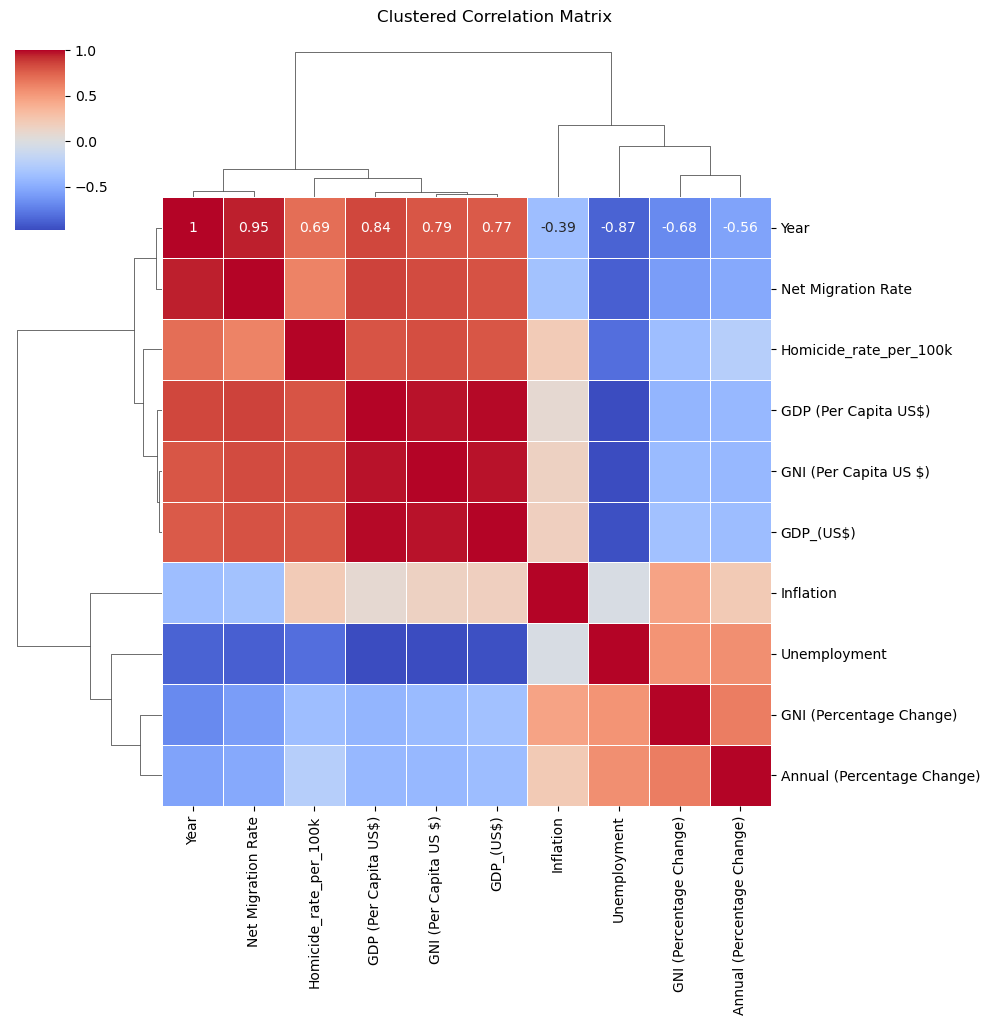

,Year,GDP (Per Capita US$),GNI (Per Capita US $),GNI (Percentage Change),Homicide_rate_per_100k,Annual (Percentage Change),Inflation,Unemployment,Net Migration Rate,GDP_(US$)
0,2000,7586.43,5140,10.54,9.01,25.24,3.555413,12.100,-4.353,8.154342e+09
1,2001,8123.99,5770,12.26,11.28,25.24,5.536653,10.880,-3.811,8.824849e+09
2,2002,8315.50,6420,11.27,12.70,12.62,4.150059,10.390,-3.270,9.008298e+09
3,2003,10505.01,7650,19.16,16.92,33.17,3.811106,10.480,-2.729,1.130546e+10
4,2004,12344.57,9190,20.13,19.10,12.90,3.721549,8.330,-2.750,1.328029e+10
5,2005,14865.93,10590,15.23,28.19,47.60,6.874535,7.950,-2.771,1.598239e+10
6,2006,17116.79,12560,18.60,26.94,-4.43,8.329604,6.270,-2.793,1.836936e+10
7,2007,20207.88,14170,12.82,28.23,4.79,7.894388,5.540,-2.814,2.164162e+10
8,2008,25836.24,16370,15.53,39.27,39.10,12.030345,4.630,-2.835,2.787159e+10
9,2009,17908.72,15270,-6.72,36.18,-7.87,6.978087,5.280,-2.387,1.917217e+10


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to include only rows where 'Year' is less than or equal to 2020
filtered_df = soc_info_07[soc_info_07['Year'] <= 2020]

# Select only numeric features
numeric_df = filtered_df.select_dtypes(include='number')
numeric_df = numeric_df.dropna(axis=1)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Replace NaN or infinite values in the correlation matrix
corr_matrix = corr_matrix.fillna(0)  # Replace NaN with 0
corr_matrix = corr_matrix.replace([float('inf'), -float('inf')], 0)  # Replace infinite values with 0

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10, 10), linewidths=0.5)
plt.suptitle("Clustered Correlation Matrix", y=1.02)
plt.show()
numeric_df

## Model Training

### Multinomial Logistic Regression

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = master_df.copy()
df = df[df['Year'] == 2020]
constituencies = [
    "ELECTORAL_DISTRICT_ARIMA", "ELECTORAL_DISTRICT_AROUCA/MALONEY", "ELECTORAL_DISTRICT_BARATARIA/SAN JUAN", "ELECTORAL_DISTRICT_CARONI CENTRAL", "ELECTORAL_DISTRICT_CARONI EAST",
    "ELECTORAL_DISTRICT_CHAGUANAS EAST", "ELECTORAL_DISTRICT_CHAGUANAS WEST", "ELECTORAL_DISTRICT_COUVA NORTH", "ELECTORAL_DISTRICT_COUVA SOUTH", "ELECTORAL_DISTRICT_CUMUTO/MANZANILLA",
    "ELECTORAL_DISTRICT_D'ABADIE/O'MEARA", "ELECTORAL_DISTRICT_DIEGO MARTIN CENTRAL", "ELECTORAL_DISTRICT_DIEGO MARTIN NORTH/EAST", "ELECTORAL_DISTRICT_DIEGO MARTIN WEST",
    "ELECTORAL_DISTRICT_FYZABAD", "ELECTORAL_DISTRICT_LA BREA", "ELECTORAL_DISTRICT_LA HORQUETTA/TALPARO", "ELECTORAL_DISTRICT_LAVENTILLE EAST/MORVANT", "ELECTORAL_DISTRICT_LAVENTILLE WEST",
    "ELECTORAL_DISTRICT_LOPINOT/BON AIR WEST", "ELECTORAL_DISTRICT_MAYARO", "ELECTORAL_DISTRICT_MORUGA/TABLELAND", "ELECTORAL_DISTRICT_NAPARIMA", "ELECTORAL_DISTRICT_OROPOUCHE EAST",
    "ELECTORAL_DISTRICT_OROPOUCHE WEST", "ELECTORAL_DISTRICT_POINT FORTIN", "ELECTORAL_DISTRICT_POINTE-A-PIERRE", "ELECTORAL_DISTRICT_PORT-OF-SPAIN NORTH/ST. ANN'S WEST",
    "PORT-OF-SPAIN SOUTH", "PRINCES TOWN", "SAN FERNANDO EAST", "SAN FERNANDO WEST", "SIPARIA",
    "ELECTORAL_DISTRICT_ST. ANN'S EAST", "ELECTORAL_DISTRICT_ST. AUGUSTINE", "ELECTORAL_DISTRICT_ST. JOSEPH", "ELECTORAL_DISTRICT_TABAQUITE", "ELECTORAL_DISTRICT_TOBAGO EAST", "ELECTORAL_DISTRICT_TOBAGO WEST",
    "ELECTORAL_DISTRICT_TOCO/SANGRE GRANDE", "ELECTORAL_DISTRICT_TUNAPUNA", "ELECTORAL_DISTRICT_TOTAL"
]

# Step 2: Get indexes where Year == 2024
df_2025 = master_df[master_df['Year'] == 2024]
indexes_2025 = df_2025.index.tolist()

# Step 3: Make key-value pairs
index_constituency_mapping = dict(zip(indexes_2025, constituencies))

# Add a column for the winning party
df['Winning_Party'] = df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)

# Add a column for the margin of victory
df['Margin_of_Victory'] = df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].apply(
    lambda row: row.max() - sorted(row)[-2], axis=1
)

# Define thresholds
safe_margin_threshold = 0.20    # Safe seat if margin of victory > 20%
marginal_margin_threshold = 0.20  # Marginal seat if margin of victory < 10%

# Identify safe seats
safe_seats = df[
    (df['Margin_of_Victory'] > safe_margin_threshold)
]

safe_seat_columns = safe_seats.loc[:, safe_seats.columns.str.startswith('ELECTORAL_DISTRICT_')]

# Extract the unique columns where the value is True or 1
unique_safe_seats = safe_seat_columns.columns[(safe_seat_columns == True).any()].tolist()

# Identify marginal seats
marginal_seats = df[df['Margin_of_Victory'] < marginal_margin_threshold]
marginal_seat_columns = marginal_seats.loc[:, marginal_seats.columns.str.startswith('ELECTORAL_DISTRICT_')]

# Extract the unique columns where the value is True or 1
unique_marginal_seats = marginal_seat_columns.columns[(marginal_seat_columns == True).any()].tolist()

# Get seat names (columns) where any value is True
seat_columns = marginal_seat_columns.columns[(marginal_seat_columns == True).any()]

# Create a dictionary where key = index, value = seat name
seat_index_mapping = {}

for seat in seat_columns:
    # Find the index (row) where the seat is True
    matching_indexes = marginal_seat_columns.index[marginal_seat_columns[seat] == True].tolist()
    for idx in matching_indexes:
        seat_index_mapping[idx] = seat

unique_safe_seats = [seat for seat in unique_safe_seats if seat not in unique_marginal_seats]
unique_marginal_seats.remove('ELECTORAL_DISTRICT_TOTAL')

print("Number of Safe Seats:", len(unique_safe_seats))
print("Number of Marginal Seats:", len(unique_marginal_seats))

seat_mapping_marginal = {}
seat_mapping_safe = {}

for index, constituency in index_constituency_mapping.items():
    if constituency in unique_safe_seats:
        seat_mapping_safe[index] = constituency
    elif constituency in unique_marginal_seats:
        seat_mapping_marginal[index] = constituency

unique_safe_seats, unique_marginal_seats

Number of Safe Seats: 29
Number of Marginal Seats: 12


(['ELECTORAL_DISTRICT_ARIMA',
  'ELECTORAL_DISTRICT_AROUCA/MALONEY',
  'ELECTORAL_DISTRICT_CARONI CENTRAL',
  'ELECTORAL_DISTRICT_CARONI EAST',
  'ELECTORAL_DISTRICT_CHAGUANAS WEST',
  'ELECTORAL_DISTRICT_COUVA NORTH',
  'ELECTORAL_DISTRICT_COUVA SOUTH',
  "ELECTORAL_DISTRICT_D'ABADIE/O'MEARA",
  'ELECTORAL_DISTRICT_DIEGO MARTIN CENTRAL',
  'ELECTORAL_DISTRICT_DIEGO MARTIN NORTH/EAST',
  'ELECTORAL_DISTRICT_DIEGO MARTIN WEST',
  'ELECTORAL_DISTRICT_FYZABAD',
  'ELECTORAL_DISTRICT_LA BREA',
  'ELECTORAL_DISTRICT_LAVENTILLE EAST/MORVANT',
  'ELECTORAL_DISTRICT_LAVENTILLE WEST',
  'ELECTORAL_DISTRICT_LOPINOT/BON AIR WEST',
  'ELECTORAL_DISTRICT_NAPARIMA',
  'ELECTORAL_DISTRICT_OROPOUCHE EAST',
  'ELECTORAL_DISTRICT_OROPOUCHE WEST',
  'ELECTORAL_DISTRICT_POINT FORTIN',
  "ELECTORAL_DISTRICT_PORT-OF-SPAIN NORTH/ST. ANN'S WEST",
  'ELECTORAL_DISTRICT_PORT-OF-SPAIN SOUTH',
  'ELECTORAL_DISTRICT_PRINCES TOWN',
  'ELECTORAL_DISTRICT_SAN FERNANDO EAST',
  'ELECTORAL_DISTRICT_SIPARIA',
  "ELECTOR

In [112]:
seat_mapping_safe_df = pd.DataFrame(list(seat_mapping_safe.items()), columns=['Index', 'Constituency_Safe'])
seat_mapping_marginal_df = pd.DataFrame(list(seat_mapping_marginal.items()), columns=['Index', 'Constituency_Marginal'])
seat_mapping_safe_df.drop(columns=['Constituency_Safe'], inplace=True)
seat_mapping_marginal_df.drop(columns=['Constituency_Marginal'], inplace=True)

# Join with master_df for safe seats
df_safe_seats = master_df.join(seat_mapping_safe_df.set_index('Index'), how='left')
df_marginal_seats = master_df.join(seat_mapping_marginal_df.set_index('Index'), how='left')

df_safe_seats['Winning_Party'] = master_df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)
df_marginal_seats['Winning_Party'] = master_df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)
# Show the resulting DataFrames for safe and marginal seats
df_safe_seats

,ELECTORATE,P.N.M._VOTES_%,U.N.C._VOTES_%,VOTER_TURNOUT,TOTAL_NUMBER_OF_VOTES_CAST,VALID_VOTES,Year,ELECTORAL_DISTRICT_ARIMA,ELECTORAL_DISTRICT_AROUCA/MALONEY,ELECTORAL_DISTRICT_BARATARIA/SAN JUAN,...,Inflation_1y,Unemployment_1t,Unemployment_1y,Net Migration Rate_1t,Net Migration Rate_1y,GDP (Per Capita US$)_1t,GDP (Per Capita US$)_1y,GDP_(US$)_1t,GDP_(US$)_1y,Winning_Party
0,22845,0.643311,0.091528,0.589363,13464,13373,2007,True,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
1,23673,0.757795,0.093035,0.673679,15948,15908,2007,False,True,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
2,24597,0.438868,0.327791,0.668821,16451,16358,2007,False,False,True,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
3,22813,0.275943,0.458901,0.729409,16640,16594,2007,False,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,U.N.C._VOTES_%
4,23554,0.233777,0.508234,0.698820,16460,16396,2007,False,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,U.N.C._VOTES_%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,23102,0.000000,0.000000,0.000000,0,0,2024,False,False,False,...,-2.225553,-0.883768,0.171975,-2.036499,-0.001759,1.101067,0.027614,1.238641,0.027661,P.N.M._VOTES_%
206,27686,0.000000,0.000000,0.000000,0,0,2024,False,False,False,...,-2.225553,-0.883768,0.171975,-2.036499,-0.001759,1.101067,0.027614,1.238641,0.027661,P.N.M._VOTES_%
207,31096,0.000000,0.000000,0.000000,0,0,2024,False,False,False,...,-2.225553,-0.883768,0.171975,-2.036499,-0.001759,1.101067,0.027614,1.238641,0.027661,P.N.M._VOTES_%
208,27433,0.000000,0.000000,0.000000,0,0,2024,False,False,False,...,-2.225553,-0.883768,0.171975,-2.036499,-0.001759,1.101067,0.027614,1.238641,0.027661,P.N.M._VOTES_%


In [113]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

features = ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'Inflation_1t', 'Inflation_1y', 'Unemployment_1t',
            'Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y'] 

df_safe_seats_model = df_safe_seats[df_safe_seats['Year'] != 2024]

# Prepare data for classification
X_safe = df_safe_seats_model[features]
y_safe = df_safe_seats_model['Winning_Party']

# Encode the target variable
y_safe_encoded = y_safe.astype('category').cat.codes

# Split the data
X_safe_train, X_safe_test, y_safe_train, y_safe_test = train_test_split(X_safe, y_safe_encoded, test_size=0.3, random_state=42)

# Fit a classification model
# clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, class_weight='balanced')
clf = LogisticRegression(multi_class='ovr', solver='saga', max_iter=1000)
clf.fit(X_safe_train, y_safe_train)

# Make predictions
y_safe_pred = clf.predict(X_safe_test)

# Evaluate the classification model
print("Classification Report for Safe Seats:\n")
print(classification_report(y_safe_test, y_safe_pred))

print("\nConfusion Matrix for Safe Seats:\n")
print(confusion_matrix(y_safe_test, y_safe_pred))
df_safe_seats_model

Classification Report for Safe Seats:

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.52      0.59      0.55        22

    accuracy                           0.59        51
   macro avg       0.59      0.59      0.59        51
weighted avg       0.60      0.59      0.59        51


Confusion Matrix for Safe Seats:

[[17 12]
 [ 9 13]]


c:\Users\zidti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\zidti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,ELECTORATE,P.N.M._VOTES_%,U.N.C._VOTES_%,VOTER_TURNOUT,TOTAL_NUMBER_OF_VOTES_CAST,VALID_VOTES,Year,ELECTORAL_DISTRICT_ARIMA,ELECTORAL_DISTRICT_AROUCA/MALONEY,ELECTORAL_DISTRICT_BARATARIA/SAN JUAN,...,Inflation_1y,Unemployment_1t,Unemployment_1y,Net Migration Rate_1t,Net Migration Rate_1y,GDP (Per Capita US$)_1t,GDP (Per Capita US$)_1y,GDP_(US$)_1t,GDP_(US$)_1y,Winning_Party
0,22845,0.643311,0.091528,0.589363,13464,13373,2007,True,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
1,23673,0.757795,0.093035,0.673679,15948,15908,2007,False,True,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
2,24597,0.438868,0.327791,0.668821,16451,16358,2007,False,False,True,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,P.N.M._VOTES_%
3,22813,0.275943,0.458901,0.729409,16640,16594,2007,False,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,U.N.C._VOTES_%
4,23554,0.233777,0.508234,0.698820,16460,16396,2007,False,False,False,...,-0.053664,-0.781211,-0.123782,-0.436258,0.007491,0.979712,0.166013,0.976068,0.163934,U.N.C._VOTES_%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,23102,0.545169,0.448711,0.567570,13112,13073,2020,False,False,False,...,-0.513059,-1.056693,0.177199,-2.025991,-0.003478,1.057680,-0.093243,0.936773,-0.133338,P.N.M._VOTES_%
164,27686,0.669240,0.324771,0.501445,13883,13859,2020,False,False,False,...,-0.513059,-1.056693,0.177199,-2.025991,-0.003478,1.057680,-0.093243,0.936773,-0.133338,P.N.M._VOTES_%
165,31096,0.588546,0.402322,0.586474,18237,18177,2020,False,False,False,...,-0.513059,-1.056693,0.177199,-2.025991,-0.003478,1.057680,-0.093243,0.936773,-0.133338,P.N.M._VOTES_%
166,27433,0.547485,0.436021,0.631247,17317,17279,2020,False,False,False,...,-0.513059,-1.056693,0.177199,-2.025991,-0.003478,1.057680,-0.093243,0.936773,-0.133338,P.N.M._VOTES_%


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers for Logistic Regression
    'max_iter': [100, 500, 1000],  # Number of iterations
    'class_weight': ['balanced', None]  # Handling class imbalance
}

# Initialize the logistic regression model
logreg = LogisticRegression(multi_class='ovr', max_iter=1000)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_safe_train, y_safe_train)

# Get the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Get the best model from grid search
best_logreg = grid_search.best_estimator_

# Make predictions using the best model
y_safe_pred = best_logreg.predict(X_safe_test)

# Evaluate the model with a classification report and confusion matrix
print("Classification Report for Safe Seats with Tuning:\n")
print(classification_report(y_safe_test, y_safe_pred))

print("\nConfusion Matrix for Safe Seats with Tuning:\n")
print(confusion_matrix(y_safe_test, y_safe_pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best hyperparameters found:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report for Safe Seats with Tuning:

              precision    recall  f1-score   support

           0       0.64      0.86      0.74        29
           1       0.67      0.36      0.47        22

    accuracy                           0.65        51
   macro avg       0.65      0.61      0.60        51
weighted avg       0.65      0.65      0.62        51


Confusion Matrix for Safe Seats with Tuning:

[[25  4]
 [14  8]]
Best hyperparameters found:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report for Safe Seats with Tuning:

              precision    recall  f1-score   support

           0       0.64      0.86      0.74        29
           1       0.67      0.36      0.47        22

    accuracy              

c:\Users\zidti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Multinomial Linear Regression

##### PNM

In [115]:
# Prepare data for regression

df_marginal_seats_model = df_marginal_seats[df_marginal_seats['Year'] != 2024]

X_marginal = df_marginal_seats_model[features]
y_marginal = df_marginal_seats_model['P.N.M._VOTES_%']

# Split the data
X_marginal_train, X_marginal_test, y_marginal_train, y_marginal_test = train_test_split(X_marginal, y_marginal, test_size=0.45, random_state=42)

# Fit a regression model
reg = LinearRegression()
reg.fit(X_marginal_train, y_marginal_train)

# Make predictions
y_marginal_pred = reg.predict(X_marginal_test)

# Evaluate the regression model
print("Mean Squared Error for Marginal Seats: ", mean_squared_error(y_marginal_test, y_marginal_pred))
print("R-squared for Marginal Seats: ", r2_score(y_marginal_test, y_marginal_pred))

# Create a DataFrame to compare actual and predicted values
marginal_results_df = pd.DataFrame({
    'Actual_Vote_Share': y_marginal_test,
    'Predicted_Vote_Share': y_marginal_pred
})

print("\nMarginal Seats Regression Results:\n")
marginal_results_df

Mean Squared Error for Marginal Seats:  0.04071082362597672
R-squared for Marginal Seats:  0.10427953359560971

Marginal Seats Regression Results:



,Actual_Vote_Share,Predicted_Vote_Share
137,0.743823,0.483467
30,0.687817,0.475510
119,0.537743,0.486950
29,0.305307,0.475510
142,0.550374,0.483467
...,...,...
0,0.643311,0.475510
125,0.516764,0.486950
117,0.778023,0.486950
64,0.133191,0.366114


##### UNC

In [116]:
# Prepare data for regression
X_marginal = df_marginal_seats_model[features]
y_marginal = df_marginal_seats_model['U.N.C._VOTES_%']

# Split the data
X_marginal_train, X_marginal_test, y_marginal_train, y_marginal_test = train_test_split(X_marginal, y_marginal, test_size=0.4, random_state=42)

# Fit a regression model
reg = LinearRegression()
reg.fit(X_marginal_train, y_marginal_train)

# Make predictions
y_marginal_pred = reg.predict(X_marginal_test)

# Evaluate the regression model
print("Mean Squared Error for Marginal Seats: ", mean_squared_error(y_marginal_test, y_marginal_pred))
print("R-squared for Marginal Seats: ", r2_score(y_marginal_test, y_marginal_pred))

# Create a DataFrame to compare actual and predicted values
marginal_results_df = pd.DataFrame({
    'Actual_Vote_Share': y_marginal_test,
    'Predicted_Vote_Share': y_marginal_pred
})

print("\nMarginal Seats Regression Results:\n")
marginal_results_df

Mean Squared Error for Marginal Seats:  0.04719275370919612
R-squared for Marginal Seats:  0.062506792527813

Marginal Seats Regression Results:



,Actual_Vote_Share,Predicted_Vote_Share
137,0.188493,0.497490
30,0.108638,0.271543
119,0.454397,0.472185
29,0.474327,0.271543
142,0.441410,0.497490
...,...,...
141,0.370000,0.497490
32,0.568228,0.271543
66,0.800948,0.529760
127,0.178985,0.497490


In [117]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the same feature columns as used in training
features = ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate',
            'Inflation_1t', 'Inflation_1y', 'Unemployment_1t', 'Unemployment_1y',
            'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t',
            'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y']

# Filter safe_seats to only include rows for 2025
safe_seats_2025_filtered = master_df[master_df['Year'] == 2024]
safe_seats_2025_filtered = safe_seats_2025_filtered[safe_seats_2025_filtered.index.isin([index for index in seat_mapping_safe if index_constituency_mapping.get(index) in unique_safe_seats])]

# Select the same features for prediction
X_2025 = safe_seats_2025_filtered[features].copy()

# Scale using a scaler **fitted on X_safe**
scaler = StandardScaler()
X_safe_scaled = scaler.fit_transform(X_safe)        # fit on training data
X_2025_scaled = scaler.transform(X_2025)            # transform test (2025) data

# Use the best model from GridSearchCV or RandomizedSearchCV
best_model = grid_search.best_estimator_  # Use the model from GridSearchCV

# Predict class (0 or 1) using the tuned model
safe_seat_predictions = best_model.predict(X_2025_scaled)

# Optional: decode to party names
party_mapping = {0: 'P.N.M.', 1: 'U.N.C.'}
decoded_safe_predictions = [party_mapping[pred] for pred in safe_seat_predictions]

# Put predictions in a DataFrame
predictions_2025 = pd.DataFrame({
    'Constituency': safe_seats_2025_filtered.index,  # assuming index is constituency name
    'Predicted_Winning_Party': decoded_safe_predictions
})

# View the predictions
print(y_safe_train.value_counts())
print("Model Coefficients:\n", clf.coef_)
y_safe_train_pred = clf.predict(X_safe_train)
print("Training Accuracy: ", accuracy_score(y_safe_train, y_safe_train_pred))

# predictions_2025
safe_seat_predictions


1    60
0    57
Name: count, dtype: int64
Model Coefficients:
 [[-3.02859743e-04  1.69336062e-02 -1.27948507e-02  1.42842812e-02
   1.63895184e-04  2.91456898e-03  1.76196944e-03 -4.45104015e-04
  -6.85005873e-04  6.08950049e-04 -6.24308280e-04 -6.86222648e-05
   2.09727685e-04  2.07418073e-05  2.50947030e-04]]
Training Accuracy:  0.5982905982905983


c:\Users\zidti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int8)

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_safe_train, y_safe_train)
print("Feature Importances: ", rf_clf.feature_importances_)

Feature Importances:  [0.03918227 0.13826955 0.06949423 0.07474826 0.04785307 0.07137054
 0.10135527 0.04813764 0.11732169 0.03653745 0.13156065 0.03140888
 0.03705852 0.02941326 0.02628871]


In [119]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix
# import joblib

# # === 1. Define features and target ===
# features = [
#     'Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate',
#     'Inflation_1t', 'Inflation_1y', 'Unemployment_1t', 'Unemployment_1y',
#     'Net Migration Rate_1t', 'Net Migration Rate_1y',
#     'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y'
# ]

# df_safe_seats_model = df_safe_seats[df_safe_seats['Year'] != 2024]

# X_safe = df_safe_seats_model[features]
# y_safe = df_safe_seats_model['Winning_Party']

# # Encode target
# y_safe_encoded = y_safe.astype('category').cat.codes

# # === 2. Split data ===
# X_safe_train, X_safe_test, y_safe_train, y_safe_test = train_test_split(
#     X_safe, y_safe_encoded, test_size=0.4, random_state=42, stratify=y_safe_encoded
# )

# # (Optional) Scale features — Random Forests don't strictly need scaling, but if you want consistency:
# # scaler = StandardScaler()
# # X_safe_train = scaler.fit_transform(X_safe_train)
# # X_safe_test = scaler.transform(X_safe_test)

# # === 3. Define Random Forest Model and GridSearch ===
# rf = RandomForestClassifier(random_state=42)

# param_grid_rf = {
#     'n_estimators': [50, 100, 200, 300, 500],
#     'max_depth': [None, 5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'max_features': ['sqrt', 'log2', 0.8, 0.5],
#     'class_weight': ['balanced', 'balanced_subsample', None]
# }

# grid_search_rf = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid_rf,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # === 4. Train model ===
# grid_search_rf.fit(X_safe_train, y_safe_train)

# print("Best hyperparameters found: ", grid_search_rf.best_params_)

# # === 5. Evaluate ===
# best_rf = grid_search_rf.best_estimator_

# y_safe_pred_rf = best_rf.predict(X_safe_test)

# print("\nClassification Report for Safe Seats (Random Forest):\n")
# print(classification_report(y_safe_test, y_safe_pred_rf))

# print("\nConfusion Matrix for Safe Seats (Random Forest):\n")
# print(confusion_matrix(y_safe_test, y_safe_pred_rf))

# # === 6. Save model if needed ===
# joblib.dump(best_rf, "random_forest_safe_seats_model.pkl")

In [120]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()


# features = ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'Inflation_1t', 'Inflation_1y', 
#             'Unemployment_1t','Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
#             'GDP_(US$)_1y', 'VOTER_TURNOUT', 'VALID_VOTES'] 

# # print(features)

# X = master_df[features]
# print(X.columns.tolist())
# X_scaled = scaler.fit_transform(X)

# if 'VOTER_TURNOUT' not in socioeconomic_df.columns:
#     socioeconomic_df['VOTER_TURNOUT'] = 0
# if 'VALID_VOTES' not in socioeconomic_df.columns:
#     socioeconomic_df['VALID_VOTES'] = 0

# # Select features for 2025
# X_2025 = socioeconomic_df[socioeconomic_df['Year'] == 2025][features]



# # Ensure `X_2024` has the same features as the training data
# X_2025_aligned = pd.DataFrame(columns=features, index=X_2025.index)   # Create an empty DataFrame with training features
# X_2025_aligned.update(X_2025)  # Update with the values from `X_2025`
# X_2025_aligned.fillna(0, inplace=True)  # Fill missing features with 0


# # Reorder columns to match the training data
# X_2025_aligned = X_2025_aligned[features]

# # Scale the input data if scaling was applied during training
# X_2025_scaled = scaler.transform(X_2025_aligned)

# print(X_2025_scaled)

# # Predict the winning party for 2024
# winning_party_2025 = clf.predict(X_2025_scaled)

# # Decode the prediction if the target variable was encoded
# party_mapping = {0: 'P.N.M.', 1: 'U.N.C.'}  # Adjust based on your encoding
# decoded_predictions = [party_mapping[pred] for pred in winning_party_2025]

# # Count the number of seats won by each party
# seat_breakdown = pd.Series(decoded_predictions).value_counts()

# # Print the breakdown of seats
# print("Breakdown of Seats Won in 2025:")
# print(seat_breakdown)

### Support Vector Machine

##### Marginal Seats 

In [121]:
# from sklearn import metrics
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler


# df = safe_seats.copy()

# target = 'P.N.M._VOTES_%'  # P.N.M. vote share as the target

# X = df.drop(['P.N.M._VOTES_%', 'U.N.C._VOTES_%','Winning_Party', 'Margin_of_Victory'], axis=1)
# y = df[target]


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# svr = SVR(kernel='linear') 
# svr.fit(X_train, y_train)

# y_pred = svr.predict(X_test)

# #mse for eval
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# r2 = r2_score(y_test, y_pred)
# print(f"R^2 score: {r2}")

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

# print(df[features].corrwith(df['P.N.M._VOTES_%']))
# print(df[features].corrwith(df['U.N.C._VOTES_%']))


Graphical plot of SVM results

In [122]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("SVM Predictions")
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ideal predictions line
# plt.show()

### Support Vector Machine 

##### Safe Seats

In [123]:
# df = master_df.copy()

# target = 'U.N.C._VOTES_%'  # P.N.M. vote share as the target

# X = df.drop(['U.N.C._VOTES_%', 'P.N.M._VOTES_%'], axis=1)
# y = df[target]


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # initialize and train the Support Vector Regression model
# svr = SVR(kernel='linear')  # change kernel as needed
# svr.fit(X_train, y_train)

# y_pred = svr.predict(X_test)

# #mse for eval
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# r2 = r2_score(y_test, y_pred)
# print(f"R² score: {r2}")

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

Graphical plot of SVM results

In [124]:

# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("SVM Predictions")
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ideal predictions line
# plt.show()

### Idk....

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the electoral districts
districts_group_1 = [
    'ELECTORAL_DISTRICT_ARIMA',
    'ELECTORAL_DISTRICT_AROUCA/MALONEY',
    'ELECTORAL_DISTRICT_CARONI CENTRAL',
    'ELECTORAL_DISTRICT_CARONI EAST',
    'ELECTORAL_DISTRICT_CHAGUANAS WEST',
    'ELECTORAL_DISTRICT_COUVA NORTH',
    'ELECTORAL_DISTRICT_COUVA SOUTH',
    "ELECTORAL_DISTRICT_D'ABADIE/O'MEARA",
    'ELECTORAL_DISTRICT_DIEGO MARTIN CENTRAL',
    'ELECTORAL_DISTRICT_DIEGO MARTIN NORTH/EAST',
    'ELECTORAL_DISTRICT_DIEGO MARTIN WEST',
    'ELECTORAL_DISTRICT_FYZABAD',
    'ELECTORAL_DISTRICT_LA BREA',
    'ELECTORAL_DISTRICT_LAVENTILLE EAST/MORVANT',
    'ELECTORAL_DISTRICT_LAVENTILLE WEST',
    'ELECTORAL_DISTRICT_LOPINOT/BON AIR WEST',
    'ELECTORAL_DISTRICT_NAPARIMA',
    'ELECTORAL_DISTRICT_OROPOUCHE EAST',
    'ELECTORAL_DISTRICT_OROPOUCHE WEST',
    'ELECTORAL_DISTRICT_POINT FORTIN',
    "ELECTORAL_DISTRICT_PORT-OF-SPAIN NORTH/ST. ANN'S WEST",
    'ELECTORAL_DISTRICT_PORT-OF-SPAIN SOUTH',
    'ELECTORAL_DISTRICT_PRINCES TOWN',
    'ELECTORAL_DISTRICT_SAN FERNANDO EAST',
    'ELECTORAL_DISTRICT_SIPARIA',
    "ELECTORAL_DISTRICT_ST. ANN'S EAST",
    'ELECTORAL_DISTRICT_ST. AUGUSTINE',
    'ELECTORAL_DISTRICT_TABAQUITE',
    'ELECTORAL_DISTRICT_TOBAGO WEST'
]

districts_group_2 = [
    'ELECTORAL_DISTRICT_BARATARIA/SAN JUAN',
    'ELECTORAL_DISTRICT_CHAGUANAS EAST',
    'ELECTORAL_DISTRICT_CUMUTO/MANZANILLA',
    'ELECTORAL_DISTRICT_LA HORQUETTA/TALPARO',
    'ELECTORAL_DISTRICT_MAYARO',
    'ELECTORAL_DISTRICT_MORUGA/TABLELAND',
    'ELECTORAL_DISTRICT_POINTE-A-PIERRE',
    'ELECTORAL_DISTRICT_SAN FERNANDO WEST',
    'ELECTORAL_DISTRICT_ST. JOSEPH',
    'ELECTORAL_DISTRICT_TOBAGO EAST',
    'ELECTORAL_DISTRICT_TOCO/SANGRE GRANDE',
    'ELECTORAL_DISTRICT_TUNAPUNA'
]

# Combine all districts into a single list
all_districts = districts_group_1 + districts_group_2

# Load the dataset
master_df = pd.read_csv("csvs/master_df.csv")

# Filter the dataset for the specified districts
filtered_df = master_df[master_df.columns.intersection(all_districts + ['Year', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'Winning_Party'])]

# Ensure the 'Winning_Party' column exists
if 'Winning_Party' not in filtered_df.columns:
    filtered_df['Winning_Party'] = filtered_df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)

# Define features and target
features = all_districts
target = 'Winning_Party'

# Encode the target variable
filtered_df[target] = filtered_df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = filtered_df[features]
y = filtered_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

# Predict for 2024 (or any future year)
future_year_df = master_df[master_df['Year'] == 2024]
future_X = future_year_df[features]
future_X_scaled = scaler.transform(future_X)

future_predictions = clf.predict(future_X_scaled)
future_predictions_decoded = pd.Series(future_predictions).map({0: 'P.N.M.', 1: 'U.N.C.'})

# Display predictions for 2024
future_year_df['Predicted_Winning_Party'] = future_predictions_decoded
print("\nPredictions for 2024:\n", future_year_df[['Year', 'Predicted_Winning_Party'] + features])

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        42
           1       0.60      0.43      0.50        21

    accuracy                           0.71        63
   macro avg       0.68      0.64      0.65        63
weighted avg       0.70      0.71      0.70        63


Confusion Matrix:
 [[36  6]
 [12  9]]

Accuracy Score:
 0.7142857142857143

Predictions for 2024:
      Year Predicted_Winning_Party  ELECTORAL_DISTRICT_ARIMA  \
168  2024                     NaN                      True   
169  2024                     NaN                     False   
170  2024                     NaN                     False   
171  2024                     NaN                     False   
172  2024                     NaN                     False   
173  2024                     NaN                     False   
174  2024                     NaN                     False   
175  2024                     NaN            

C:\Users\zidti\AppData\Local\Temp\ipykernel_26040\3064175739.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Winning_Party'] = filtered_df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)
C:\Users\zidti\AppData\Local\Temp\ipykernel_26040\3064175739.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[target] = filtered_df[target].astype('category').cat.codes
c:\Users\zidti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was d

### Decision Tree Regression and Classifiers w/o marginal

##### Decision Tree Regressor w/o marginal

### NEW FEATURES ENGINEERED

#### Decision Tree Regressor

PNM

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Year', 'Homicide_rate_per_100k', 'Inflation', 'Net Migration Rate', 
            'Unemployment', 'GDP (Per Capita US$)', 'VOTER_TURNOUT', 'VALID_VOTES']
target = 'P.N.M._VOTES_%'  # Replace with 'U.N.C._VOTES_%' for UNC predictions

X = master_df[features]
y = master_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Squared Error: 0.030938395655264142
R² Score: 0.5675434592849915
       Actual  Predicted
30   0.687817   0.590030
172  0.000000   0.000000
84   0.695200   0.459858
199  0.000000   0.000000
60   0.663164   0.510065


In [127]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Define features and target
# X = master_df[features]
# y = master_df['P.N.M._VOTES_%']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train Decision Tree Regressor
# regressor = DecisionTreeRegressor(random_state=42)
# regressor.fit(X_train, y_train)

# # Make predictions
# y_pred = regressor.predict(X_test)

# # Evaluate the model
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R² Score:", r2_score(y_test, y_pred))

UNC

In [128]:
features = ['Year', 'Homicide_rate_per_100k', 'Inflation', 'Net Migration Rate', 
            'Unemployment', 'GDP (Per Capita US$)', 'VOTER_TURNOUT', 'VALID_VOTES']
target = 'U.N.C._VOTES_%'  # Replace with 'U.N.C._VOTES_%' for UNC predictions

X = master_df[features]
y = master_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Squared Error: 0.048910396006738674
R² Score: 0.2286758956260987
       Actual  Predicted
30   0.108638   0.161183
172  0.000000   0.000000
84   0.292500   0.304250
199  0.000000   0.000000
60   0.168418   0.832041


In [129]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Define features and target
# X = master_df[features]
# y = master_df['U.N.C._VOTES_%']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train Decision Tree Regressor
# regressor = DecisionTreeRegressor(random_state=42)
# regressor.fit(X_train, y_train)

# # Make predictions
# y_pred = regressor.predict(X_test)

# # Evaluate the model
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R² Score:", r2_score(y_test, y_pred))

#### Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define features and target
features = [
    'Year', 'Homicide_rate_per_100k', 'Inflation', 'Net Migration Rate',
    'Unemployment', 'GDP (Per Capita US$)', 'VOTER_TURNOUT', 'VALID_VOTES'
]
# Ensure the 'Winning_Party' column exists in master_df
if 'Winning_Party' not in master_df.columns:
    master_df['Winning_Party'] = master_df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)

X = master_df[features]
y = master_df['Winning_Party']

# Encode target variable
y_encoded = y.astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7936507936507936

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.68      0.71      0.70        21

    accuracy                           0.79        63
   macro avg       0.77      0.77      0.77        63
weighted avg       0.80      0.79      0.79        63


Confusion Matrix:
 [[35  7]
 [ 6 15]]


|--- VALID_VOTES <= 15950.00
|   |--- VALID_VOTES <= 15702.00
|   |   |--- class: 0
|   |--- VALID_VOTES >  15702.00
|   |   |--- Year <= 2015.00
|   |   |   |--- class: 0
|   |   |--- Year >  2015.00
|   |   |   |--- class: 1
|--- VALID_VOTES >  15950.00
|   |--- VALID_VOTES <= 17468.50
|   |   |--- VALID_VOTES <= 16614.50
|   |   |   |--- VALID_VOTES <= 16377.00
|   |   |   |   |--- Unemployment <= 4.87
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Unemployment >  4.87
|   |   |   |   |   |--- class: 0
|   |   |   |--- VALID_VOTES >  16377.00
|   |   |   |   |--- class: 1
|   |   |--- VALID_VOTES >  16614.50
|   |   |   |--- Year <= 2017.50
|   |   |   |   |--- class: 0
|   |   |   |--- Year >  2017.50
|   |   |   |   |--- VOTER_TURNOUT <= 0.61
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- VOTER_TURNOUT >  0.61
|   |   |   |   |   |--- VALID_VOTES <= 17103.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- VALID_VOTES >  17103.50
|   |   |   |   |   |

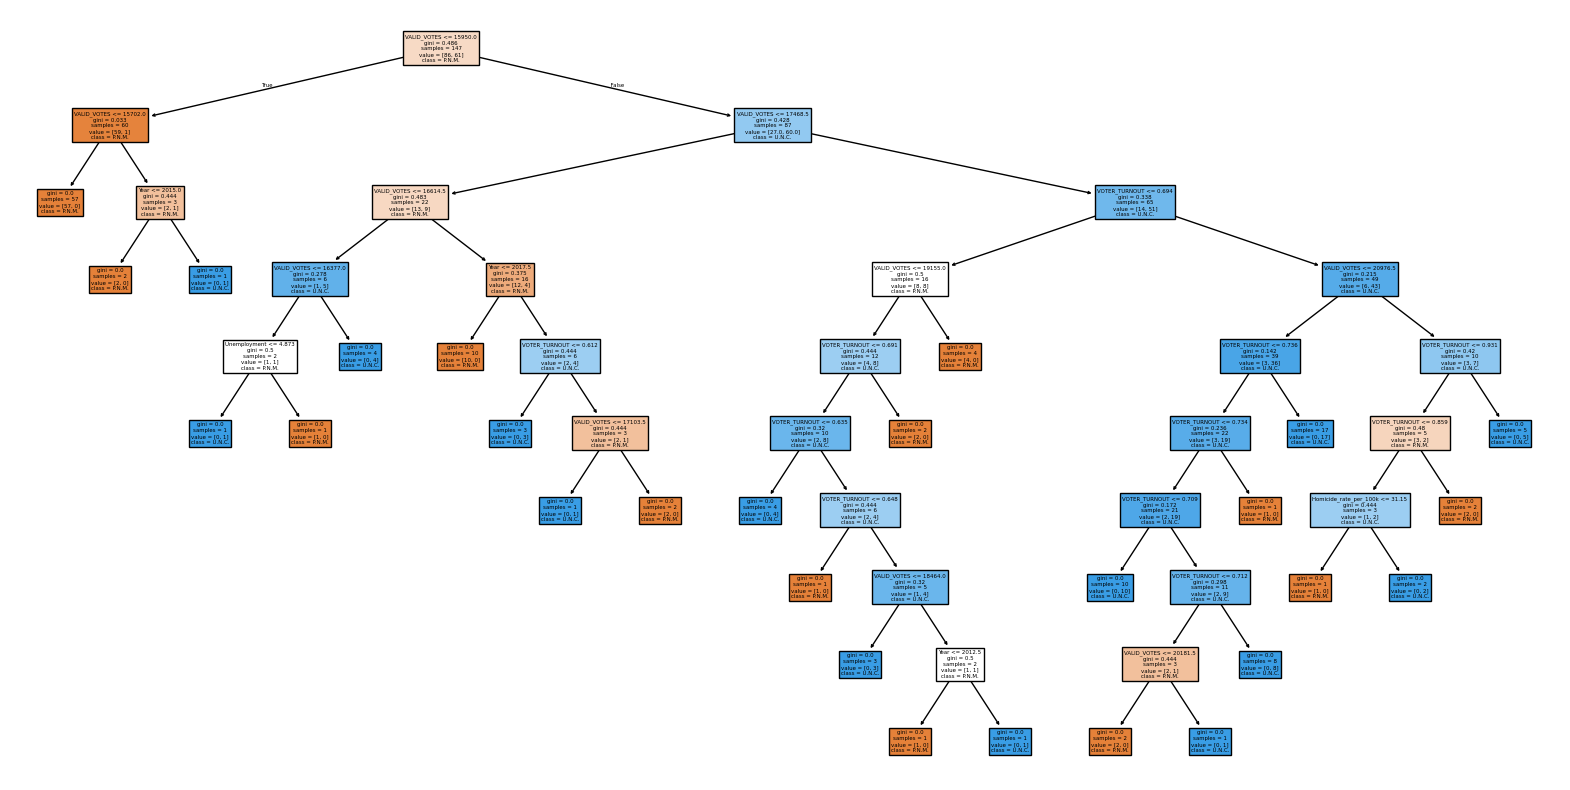

In [131]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Text representation
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['P.N.M.', 'U.N.C.'], filled=True)
plt.show()

### OLD FEATURES ENGINEERED

##### PNM

In [132]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import metrics

# decisions = master_df.copy()

# feat_cols = ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 
#             'Unemployment_1t','Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
#             'GDP_(US$)_1y', 'VOTER_TURNOUT', 'VALID_VOTES'] # All socioeconomic
# # feat_cols = ['Year', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'GDP_(US$)_1t',
# #             'GDP_(US$)_1y'] # National Economic trends
# # feat_cols = ['Inflation', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
# #             'GDP_(US$)_1y'] # Household Purchasing Power

# target = 'P.N.M._VOTES_%'  # P.N.M. vote share as the target

# X = decisions[feat_cols]
# y = decisions[target]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # # training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

# # model test
# regressor = DecisionTreeRegressor()

# regressor = regressor.fit(X_train, y_train)

# y_pred = regressor.predict(X_test)

# # performance tests 

# mse = metrics.mean_squared_error(y_test, y_pred)

# print("R^2 score:", metrics.r2_score(y_test, y_pred))

# print("Mean Squared Error:", mse)

# print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

##### UNC

In [133]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import metrics

# decisions = master_df.copy()

# feat_cols = ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 
#             'Unemployment_1t','Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
#             'GDP_(US$)_1y', 'VOTER_TURNOUT', 'VALID_VOTES'] # All socioeconomic

# target = 'U.N.C._VOTES_%'  # P.N.M. vote share as the target

# X = decisions[feat_cols]
# y = decisions[target]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # # training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

# # model test
# regressor = DecisionTreeRegressor()

# regressor = regressor.fit(X_train, y_train)

# y_pred = regressor.predict(X_test)

# # performance tests 

# mse = metrics.mean_squared_error(y_test, y_pred)

# print("R^2 score:", metrics.r2_score(y_test, y_pred))

# print("Mean Squared Error:", mse)

# print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

### Decision Tree Classisfier w/o marginal

##### PNM

In [134]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import KBinsDiscretizer

# decisions = master_df.copy()

# ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 
#             'Unemployment_1t','Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
#             'GDP_(US$)_1y', 'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES'] # All socioeconomic

# # feat_cols = ['Year', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'GDP_(US$)_1t',
# #             'GDP_(US$)_1y'] # National Economic trends
# # feat_cols = ['Inflation', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y']  # Household Purchasing Power

# target = 'P.N.M._VOTES_%'  # P.N.M. vote share as the target

# X = decisions[feat_cols] 
# y = decisions[target]  

# # discretize the target variable into bins
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # adjust `n_bins` as needed
# y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).ravel()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.1, random_state=25)

# # model test
# clf = DecisionTreeClassifier()

# clf = clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# # performance metrics 
# accuracy = metrics.accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(metrics.classification_report(y_test, y_pred))

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

##### UNC

In [135]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import KBinsDiscretizer

# decisions = master_df.copy()

# ['Year', 'Homicide_rate_per_100k', 'Annual (Percentage Change)', 'Inflation', 'Net Migration Rate', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 
#             'Unemployment_1t','Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t',
#             'GDP_(US$)_1y', 'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES'] # All socioeconomic

# # feat_cols = ['Year', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'GDP_(US$)_1t',
# #             'GDP_(US$)_1y'] # National Economic trends
# # feat_cols = ['Inflation', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y']  # Household Purchasing Power

# target = 'U.N.C._VOTES_%'  # P.N.M. vote share as the target

# X = decisions[feat_cols] 
# y = decisions[target]  

# # discretize the target variable into bins
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # adjust `n_bins` as needed
# y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).ravel()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.1, random_state=25)

# # model test
# clf = DecisionTreeClassifier()

# clf = clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# # performance metrics 
# accuracy = metrics.accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(metrics.classification_report(y_test, y_pred))

# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

### Decision Tree Regressor and Classifier based on marginal Seats

In [136]:
# df = master_df.copy()

# df['Winning_Party'] = df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].idxmax(axis=1)

# # adding a column for aa the margin of victory
# df['Margin_of_Victory'] =  df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].apply(
#     lambda row: row.max() -  sorted(row)[-2], axis=1
# )

# # thresholds 
# safe_vote_share_threshold = 0.60 # Safe seat if vote share > 60%
# safe_margin_threshold = 0.20 # Safe seat if margin of victory > 20%
# marginal_margin_threshold = 0.10 # Margnal seat if margin of victory < 10%

# # identify safe seats
# safe_seats = df[
#     (df['Margin_of_Victory'] > safe_margin_threshold) |
#     (df[['P.N.M._VOTES_%', 'U.N.C._VOTES_%']].max(axis=1) > safe_vote_share_threshold)
# ]

# # marginal seats 
# marginal_seats = df[df['Margin_of_Victory'] < marginal_margin_threshold]

# print("Number of Safe Seats: ", len(safe_seats))
# print("Number of Marginal Seats: ", len(marginal_seats))

# df.to_csv(r"csvs/master_df_with_seat_analysis.csv", index=False)


### Decision Tree Regressor w/ marginal

In [137]:
# X_safe = safe_seats[feat_cols]
# y_safe = safe_seats['P.N.M._VOTES_%']
# z_safe = safe_seats['U.N.C._VOTES_%']

# scaler = StandardScaler()
# X_safe_scaled = scaler.fit_transform(X_safe)

# # training set and test set
# X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_safe_scaled, y_safe, test_size=0.2, random_state=42)
# X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X_safe_scaled, z_safe, test_size=0.2, random_state=42)

# # model train 
# # P.N.M.
# p_regressor = DecisionTreeRegressor(random_state=42)
# p_regressor.fit(X_p_train, y_p_train)

# # U.N.C.
# p_regressor = DecisionTreeRegressor(random_state=42)
# p_regressor.fit(X_u_train, y_u_train)

# y_p_pred = regressor.predict(X_p_test)
# y_u_pred = regressor.predict(X_u_test)

# # performance tests
# mse_p = mean_squared_error(y_p_test, y_p_pred)
# mse_u = mean_squared_error(y_u_test, y_u_pred)

# r2_p = r2_score(y_p_test, y_p_pred)
# r2_u = r2_score(y_u_test, y_u_pred)

# print(f"Mean Squared Error PNM: {mse_p}  UNC: {mse_u}")
# print(f"R² Score PNM: {r2_p} UNC: {r2_u}")

# # actual vs predicted values
# print("PNM")
# results = pd.DataFrame({'Actual': y_p_test, 'Predicted': y_p_pred})
# print(results.head())

# print("UNC")
# results_u = pd.DataFrame({'Actual': y_u_test, 'Predicted': y_u_pred})
# print(results_u.head())

### Decision Tree Classisfier w/ marginal

In [138]:
# from sklearn.tree import DecisionTreeClassifier
# # Model Evaluation
# from sklearn.metrics import accuracy_score, classification_report

# X_safe = safe_seats[feat_cols]
# y_safe = safe_seats['Winning_Party']

# y_safe_encoded = y_safe.astype('category').cat.codes

# scaler = StandardScaler()
# X_safe_scaled = scaler.fit_transform(X_safe)

# # Split dataset into training set and test set
# X_safe_train, X_safe_test, y_safe_train, y_safe_test = train_test_split(X_safe_scaled, y_safe_encoded, test_size=0.2, random_state=25)

# classifier = DecisionTreeClassifier(random_state=25)
# classifier = classifier.fit(X_safe_train, y_safe_train)

# # Predict response for test dataset
# y_safe_pred = classifier.predict(X_safe_test)


# accuracy = accuracy_score(y_safe_test, y_safe_pred)
# print(f"Accuracy: {accuracy}")

# print("Classification Report:")
# print(classification_report(y_safe_test, y_safe_pred))

# results = pd.DataFrame({'Actual': y_safe_test, 'Predicted': y_safe_pred})
# print(results.head())

### Visualization

In [139]:
# # taken from datacamp
# # Install the required package
# # %pip install pydotplus

# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feat_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('elections.png')
# Image(graph.create_png())

### BACKUP

In [140]:
# X_safe = safe_seats[feat_cols]
# y_safe = safe_seats['P.N.M._VOTES_%']

# scaler = StandardScaler()
# X_safe_scaled = scaler.fit_transform(X_safe)

# # training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_safe_scaled, y_safe, test_size=0.2, random_state=42)

# # model train 
# regressor = DecisionTreeRegressor(random_state=42)
# regressor.fit(X_train, y_train)

# y_pred = regressor.predict(X_test)

# # performance tests
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R² Score: {r2}")

# # actual vs predicted values
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())

### MLP Regression

In [141]:
# from sklearn.neural_network import MLPRegressor

# df = safe_seats.copy()

# X = df[features]  
# y = df['P.N.M._VOTES_%']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'hidden_layer_sizes': [(100,), (100, 30), (50, 50), (150, 75, 30)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive']
# }

# mlp = MLPRegressor(max_iter=1000, random_state=42)

# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [142]:
# mlp = MLPRegressor(hidden_layer_sizes=(100,30), 
#                    activation='relu',  
#                    solver='adam',      
#                    alpha=0.0001,       
#                    max_iter=1000,
#                    random_state=42,
#                    learning_rate= 'constant')


# mlp.fit(X_train, y_train)

# y_pred = mlp.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse}")
# print(f"R² Score: {r2}")

# print("Actual vs Predicted:")
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results.head())